============================================================================================================

### <center> **Group Project by:**<br>
#### <center> Sofia Estero<br> Anastasiya Kozikis<br> Zihao Wang 

============================================================================================================

# Background: The effect of female tertiary education on fertility rate

As declared by Alvarez (2022) in his article published in the World Economic Forum, over the last 70 years fertility rates have decreased worldwide, with a total 50% decline from 1950 to 2020. There are different reasons that contribute to this phenomenon, among them women's empowerment in education and the workforce, lower child mortality and the increased cost of raising children.
The UN estimated a gradual decrease in fertility and an increase in life expectations, with the world population rising from 7.7bn today to 11.2bn by 2100 (with a 95 % confidence interval of 9.6bn and 13.2bn). In this scenario, education may play a huge role as a driver in the reduction of fertility (NAIROBI ET. AL, 2019). In fact, in the last years educational empowerment of women has been presented as a future policy tool for the control of population growth. This relation may have many effects, not only on population growth but also in many other fields such as gender equality and pay gap.

Therefore, **this article tries to isolate the effect of tertiary education on fertility rate**. 

The research topic chosen has been widely discussed in the last decades. Indeed, many articles and studies support a negative correlation among the two (Upadhyay, 2014; Günes, 2013; Ali, 2018). However, the magnitude of this effect changes among countries and its interpretation is still unclear (Jungho, 2016). Indeed, the causality of the relationship is still a subject of debate (Chen et. al, 2022). Moreover, as some articles suggest, the effect of education on fertility rate changes according to the educational level considered (Bongaarts, 2017). For this reason, this article shrinks the research on the effect of tertiary female education, relating only to education at college and university level (Cambridge Dictionary, 2022). This decision was mainly lead by the reasoning that tertiary education gives access to a broader range of jobs, usually at hiigher positions, with respect to lower levels of education. 

Bharati (2021) found that the tertiary education expansion in Taiwan, which starting in 1996, lowered the fertility of women both with and without tertiary education, suggesting that the effect did not operate through education alone, therefore, our aim is to try isolate this relationship and study its correlation and causality. 
Our main variables are defined as follows:<br>

- Our **dependent variable (Y)** is the **fertility rate, total (births per woman)**. It is computed by dividing the total number of births in a country by the total number of women in their fertility period. It can be interpreted as the number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year.
- Our **independent variable (X1)** is **female school enrollment at the tertiary level (% gross)**. Gross enrollment ratio is the ratio of total female enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Tertiary education, whether or not to an advanced research qualification, normally requires, as a minimum condition of admission, the successful completion of education at the secondary level.
- The **independent variable (X2)** is the **government expenditure on education.** It is expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.). It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments.
- The **independent variable (X3)** is the **contraceptive prevalence**, which is measures as the percentage of married women ages 15-49 who are practicing, or whose sexual partners are practicing, any method of contraception (modern or traditional).


# Table of Content

<ul class="roman">
<li>Preparation</li>
<li>Data Accessing and Cleaning
<li>Univariate Analysis
 <ul class="square">
  <li>Outcome Variable: Fertility rate, total (births per woman)</li>
  <li>Main Explanatory Variable: School enrollment, tertiary, female (% gross)</li>
  <li>Additional Explanatory Variable 1: Government expenditure on education, total (% of GDP)</li>
  <li>Additional Explanatory Variable 2: Contraceptive prevalence (% of married women aged 15-49)</li>
 </ul>
 </li>
 <li>Bivariate Analysis</li>
 <ul class="square">
 <li>Endogeneity Analysis</li>
  <ul class="square">
 <li>Omitted Variables</li>
 <li>Reverse Causality</li>
 </ul>
 </ul>
 </li>
 <li>Difference-in-Difference: US & UK</li>
  <ul class="square">
 <li>Trend in School Enrollment</li>
  <li>DiD Graph (Fertility)</li>
 <li>DiD Formula Model</li>
 <li>Placebo Test</li>
 </ul>
 </li>
<li>Conclusion and Outlook</li>
<li>References</li>
<li>Appendix</li>
</ul>

# Preparation

Below you can find the packages we will use. You may need to install some of them before. To do so, use the following code format:

In [1]:
!pip install linearmodels
!pip install stargazer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 7.8 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We additionally recommend to run the following snippet to display all outputs of cells, as the default is to display only the last output per cell.

In [2]:
# This code displays all outputs of each cell, more convenient for analysis and comparisons
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Furthermore, we are going to access the [Gender Data Portal](https://genderdata.worldbank.org/), a database provided by The World Bank. This portal makes the latest gender statistics accessible, with the mission to improve the understanding of gender data and facilitate analyses that inform policy choices.

We are accessing the variables, or indicators, of the database that you will see through their API. [(list of all indicators)](https://genderdata.worldbank.org/indicators/). The documentation of the API package is available [here](https://pypi.org/project/wbgapi/).

In [3]:
import sys
!{sys.executable} -m pip install wbgapi # installation of the API package
import wbgapi as wb
import pandas as pd
import plotly.express as px
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from stargazer.stargazer import Stargazer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Accessing and Cleaning

Now that we have installed all the necessary packages, we can take a closer look at our variables using their IDs mentioned before. 

In [4]:
# Main variables
wb.series.info("SE.TER.ENRR.FE") # female school enrollment at the tertiary level
wb.series.info("SP.DYN.TFRT.IN") # fertility rate

# Other variables
wb.series.info("SE.XPD.TOTL.GD.ZS") # government expenditure on education
wb.series.info("SP.DYN.CONU.ZS") # contraceptive prevalence of any kind among women

id              value
--------------  ---------------------------------------------
SE.TER.ENRR.FE  School enrollment, tertiary, female (% gross)
                1 elements

id              value
--------------  ----------------------------------------
SP.DYN.TFRT.IN  Fertility rate, total (births per woman)
                1 elements

id                 value
-----------------  -----------------------------------------------------
SE.XPD.TOTL.GD.ZS  Government expenditure on education, total (% of GDP)
                   1 elements

id              value
--------------  --------------------------------------------------------------------
SP.DYN.CONU.ZS  Contraceptive prevalence, any method (% of married women ages 15-49)
                1 elements

We then create a dataframe by accessing the API's indicators. We additionally restrict the data to 1970 - 2020 because there is data availability for our variables of interest in this time range only. 

Note: the execution of the cell below may take a few minutes due to the API call.

In [5]:
wbg = wb.data.DataFrame(["SE.TER.ENRR.FE", "SP.DYN.TFRT.IN", "SE.XPD.TOTL.GD.ZS", "SP.DYN.CONU.ZS"], 
                        time=range(1970, 2021), columns='series', labels=True).reset_index() # We remove the multi-index created by default
wbg

economy    time                      Country  Time  SE.TER.ENRR.FE  \
0         ZWE  YR2020                     Zimbabwe  2020             NaN   
1         ZWE  YR2019                     Zimbabwe  2019             NaN   
2         ZWE  YR2018                     Zimbabwe  2018             NaN   
3         ZWE  YR2017                     Zimbabwe  2017         9.68927   
4         ZWE  YR2016                     Zimbabwe  2016         8.54473   
...       ...     ...                          ...   ...             ...   
13561     AFE  YR1974  Africa Eastern and Southern  1974         1.76127   
13562     AFE  YR1973  Africa Eastern and Southern  1973         1.70510   
13563     AFE  YR1972  Africa Eastern and Southern  1972         1.70165   
13564     AFE  YR1971  Africa Eastern and Southern  1971         1.70182   
13565     AFE  YR1970  Africa Eastern and Southern  1970         1.70385   

       SE.XPD.TOTL.GD.ZS  SP.DYN.CONU.ZS  SP.DYN.TFRT.IN  
0                    NaN             NaN        3.545000  
1                    NaN             NaN        3.599000  
2                3.86611             NaN        3.659000  
3                5.81878             NaN        3.706000  
4                5.47262             NaN        3.771000  
...                  ...             ...             ...  
13561                NaN             NaN        6.820429  
13562                NaN             NaN        6.832243  
13563                NaN             NaN        6.841097  
13564                NaN             NaN        6.844988  
13565                NaN             NaN        6.838304  

[13566 rows x 8 columns]

Now that we have our dataframe, we need to do some housekeeping, by ordering it, renaming columns for more clarity, and the like.

In [6]:
# Creating a copy of the original dataframe, which we will work with from now on
df = wbg.copy()

# Deleting the 'time' column
del df['time']

# Renaming columns
df.rename(columns={'economy': 'iso3', 'Time': 'year', 'Country': 'country',
                   'SP.DYN.TFRT.IN': 'Fertility', # Fertility rate, total (births per woman)
                   'SE.TER.ENRR.FE': 'School', # School enrollment, tertiary, female (% gross)
                   'SE.XPD.TOTL.GD.ZS': 'Government', # Government expenditure on education, total (% of GDP)
                   'SP.DYN.CONU.ZS': 'Contraceptive'}, inplace=True) # Contraceptive prevalence, any method (% of married women ages 15-49)

# Converting years to numerical values
df['year'] = df['year'].astype('int')

# Sorting the years
df.sort_values(['iso3', 'year'], inplace=True)

# Pretty printing, restricting to 170 pixels column width
HTML("<style>.rendered_html th {max-width: 170px;}</style>")
df

iso3   country  year   School  Government  Contraceptive  Fertility
10607  ABW     Aruba  1970      NaN         NaN            NaN      2.908
10606  ABW     Aruba  1971      NaN         NaN            NaN      2.788
10605  ABW     Aruba  1972      NaN         NaN            NaN      2.691
10604  ABW     Aruba  1973      NaN         NaN            NaN      2.613
10603  ABW     Aruba  1974      NaN         NaN            NaN      2.552
...    ...       ...   ...      ...         ...            ...        ...
4      ZWE  Zimbabwe  2016  8.54473     5.47262            NaN      3.771
3      ZWE  Zimbabwe  2017  9.68927     5.81878            NaN      3.706
2      ZWE  Zimbabwe  2018      NaN     3.86611            NaN      3.659
1      ZWE  Zimbabwe  2019      NaN         NaN            NaN      3.599
0      ZWE  Zimbabwe  2020      NaN         NaN            NaN      3.545

[13566 rows x 7 columns]

In order to have a visual representation of the data availability for each variable in the different countries we plotted four maps. 

In [7]:
df2 = df.groupby('iso3', as_index=False).count() # counting frequency per country code

for col in df2.columns[3:]:
  maps = px.choropleth(
      df2,                                 
      locations="iso3",                    
      locationmode="ISO-3",               
      color=col,                       
      color_continuous_scale=px.colors.sequential.Blues,   
  )
  maps.update_layout( 
      title={                                
          'text': "Data availability per country",
          'y':0.95,
          'x':0.43,
          'xanchor': 'center',
          'yanchor': 'top'})

As we can see from the graphs, fertility rate is the variable with more data while contraceptive is the one with lower data.

Now we check for outlier values, which can significantly impact our statistical analysis later on if not taken care of. In order to do so, we use the z-score. We therefore compute the z-score for each data point in our dataframe and if the score is greater than 3, then we can classify that point as an outlier, because as a rule of thumb, any point outside of 3 standard deviation is considered an outlier.

In [8]:
def detect_outlier(dataset):
    outliers = []
    threshold = 3
    mean_1 = np.mean(dataset)
    std_1 = np.std(dataset)
    
    for x in dataset:
        z_score= (x - mean_1)/std_1 
        if np.abs(z_score) >= threshold:
            outliers.append(x)
    return outliers

detect_outlier(df['Fertility'])
detect_outlier(df['School'])
detect_outlier(df['Government'])
detect_outlier(df['Contraceptive'])
# We see there are outliers in the school enrollment and government expenditure columns.

[]

[109.167213439941,
 112.798439025879,
 114.646446228027,
 120.284042358398,
 125.994529724121,
 140.951751708984,
 143.023529052734,
 133.337768554688,
 124.439758300781,
 133.847473144531,
 133.15788269043,
 136.799514770508,
 146.838027954102,
 143.199783325195,
 118.624900817871,
 112.531227111816,
 117.120079040527,
 119.133163452148,
 124.958221435547,
 132.724731445313,
 136.99723815918,
 142.882431030273,
 150.04606628418,
 152.402816772461,
 110.337966918945,
 116.224258422852,
 112.41471862793,
 115.880889892578,
 111.845207214355,
 111.019950866699,
 109.43717956543,
 115.811836242676,
 130.492446899414,
 109.622787475586,
 114.487152099609,
 116.249076843262,
 111.38614654541,
 115.364486694336]

[14.7170495986938,
 10.6785898208618,
 10.2682304382324,
 10.5577802658081,
 11.8682098388672,
 14.0590801239014,
 13.1248598098755,
 12.8373098373413,
 12.407919883728,
 13.5126600265503,
 12.4164199829102,
 12.8722324371338,
 13.3367881774902,
 12.8025388717651,
 12.004599571228,
 11.0861396789551,
 11.0285596847534,
 10.5601902008057,
 10.1543550491333,
 10.8710098266602,
 11.1858701705933,
 11.9881200790405,
 12.9700002670288,
 13.3843803405762,
 12.0265302658081,
 11.2323703765869,
 10.8631601333618,
 11.9682903289795,
 12.3946599960327,
 14.1988296508789,
 11.3640098571777,
 12.4993495941162,
 13.2195701599121,
 11.1090097427368,
 12.0796604156494,
 11.2712802886963,
 12.3295202255249,
 13.7318296432495,
 11.8198003768921,
 17.5599994659424,
 23.2700004577637,
 20.5900001525879,
 19.7099990844727,
 15.5900001525879,
 15.9899997711182,
 15.6700000762939,
 17.6299991607666,
 15.2799997329712,
 15.2200002670288,
 15.1999998092651,
 15.75,
 13.6250038146973,
 11.7809410095215,
 10.63

[]

We replace outlier values with NaN, this will ensure that descriptive statistics aren't influenced by such values. There are other options for dealing with outliers, such as deleting rows with outliers (at the risk of losing sound data from other columns), replacing outliers with the median/mean value of the column (however this means putting in 'wrong' values which can create wrong data interpretations later). For the purpose of this study we prefer replacing them with NaN because we deem it as the best option among the ones listed above.

In [9]:
for outlier in detect_outlier(df['School']):
    df.loc[df['School'] == outlier, 'School'] = None

for outlier in detect_outlier(df['Government']):
    df.loc[df['Government'] == outlier, 'Government'] = None

As a last step, we check for any duplicate values for each combination of country and year, which would need to be removed in order to make sure that we only have unique values per combination. Luckly, we do not find any.

In [10]:
# Checking for duplicate rows per combination of country code and year

def duplicate_of_country_and_year_detector(dataframe):
    df_count = dataframe.groupby(['iso3','year']).size().reset_index().rename(columns={0:'count'})
    df_count2 = df_count.loc[df_count['count'] > 1]
    return df_count2

duplicate_of_country_and_year_detector(df) # No duplicates

Empty DataFrame
Columns: [iso3, year, count]
Index: []

# Univariate Analysis

Although the dataset is cleaned, the distribution could also be not so good as we expect. So we have to conduct the univariate analysis where we could summarize the main statistical characteristics of the variables. We choose to conduct this analysis to all the four variables, including the dependent variable and three possible independent variables.

The univariate analysis will include basic statistical characteristics (mean, standard deviation, etc.), the skewness of the distribution, the mean value in each counrty/region (regional distribution), and trend of the overall mean value over time.

## Outcome Variable: Fertility rate, total (births per woman)

We start with the outcome variable fertility rate, computed by dividing the total number of births in a country by the total number of women in their fertility period.

In [11]:
df['Fertility'].describe()

count    12772.000000
mean         3.687605
std          1.890993
min          0.792000
25%          1.998893
50%          3.125289
75%          5.305000
max          8.864000
Name: Fertility, dtype: float64

We have 12,496 rows. 
Then we can check the skewness of this variable by displaying its distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83e1cb370>]],
      dtype=object)

Fertility rate, total (births per woman): 
0.509490227144812


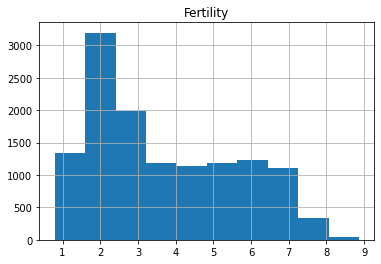

In [12]:
# Histogram and skewness of the outcome variable
df.hist(column='Fertility')
print("Fertility rate, total (births per woman): ")
print(skew(df['Fertility'], nan_policy='omit'))

The skewness is within the threshold (-3 to 3)  and the distribution is slightly asymmetric on the left. Thus, we don't need to transform this variable.<br>

We then plot the mean of values accross countries in order to have have a better understanding of the situation.

In [13]:
# Spatial distribution
df_map = df.groupby(['iso3']).mean()
df_map.reset_index(inplace=True)
df_map = df_map.rename(columns = {'index':'iso3'})
fig = px.choropleth(df_map, locations='iso3',
                    locationmode='ISO-3',
                    color='Fertility', 
                    hover_name='iso3',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout( 
      title={                                
          'text': "Fertility rate variation in countries",
          'y':0.95,
          'x':0.43,
          'xanchor': 'center',
          'yanchor': 'top'})

We can see from the graph that Europe, North America, or Australia have low values while African countries have higher values.<br>

Consequently we check the trend of fertility rate over time to get an idea its development.

<Figure size 1440x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd83dc79310>,
 <a list of 26 Text major ticklabel objects>)

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Distribution of fertility rate over time')

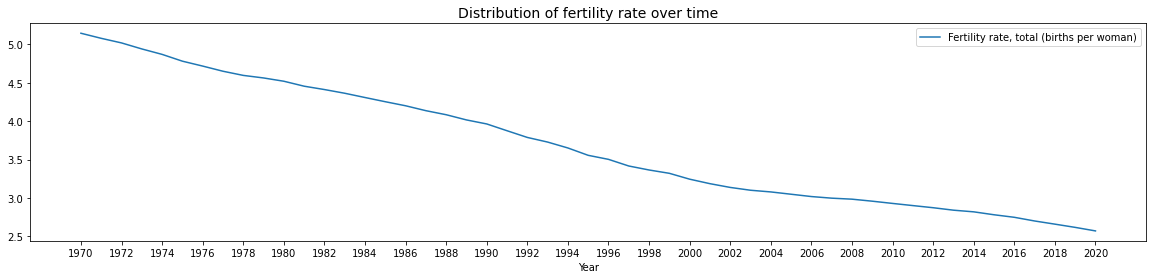

In [14]:
# Distribution over time
df_line = df.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'iso3'})
plt.figure(figsize=(20,4))
plt.xticks(np.arange(1970, 2021, 2))
plt.xlabel('Year')
plt.title('Distribution of fertility rate over time',fontsize=14)
plt.plot(df_line['year'], df_line['Fertility'], label = "Fertility rate, total (births per woman)")
plt.legend()

Overall the graph shows a decreasing trend, in line with our assumption and most researches.

## Main Explanatory Variable: School enrollment, tertiary, female (% gross)

Similar to what we have done before, we now conduct the same analysis with three explanatory/independent variables: school enrollment, government expenditure on education, and contraceptive prevalence.

In [15]:
df['School'].describe() 
# we have 7184 data points

count    7401.000000
mean       25.704160
std        26.711003
min         0.000000
25%         4.439240
50%        15.724530
75%        39.301159
max       108.862679
Name: School, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83dbadaf0>]],
      dtype=object)

Text(0.5, 1.0, 'School enrollment, tertiary, female (% gross): ')

1.1595654249652463


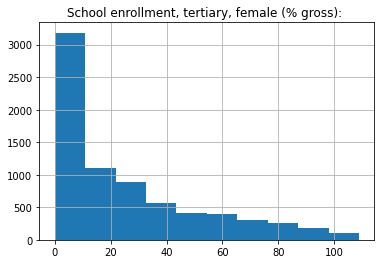

In [16]:
# Histogram and skewness of the variable
df.hist(column='School')
plt.title("School enrollment, tertiary, female (% gross): ")
print(skew(df['School'], nan_policy='omit'))

Although the skewness is within the threshold, it's still strongly asymmetric on the left. Therefore, we can transform it logarithmically.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83db295b0>]],
      dtype=object)

Text(0.5, 1.0, 'Skewness School enrollment, tertiary, female (% gross), log+1: ')

-0.32098312100611487


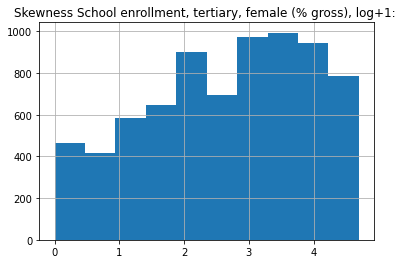

In [17]:
# deal with it logarithmically
df['School_log'] = np.log(df['School']+1) # School enrollment, tertiary, female (% gross), log+1
df.hist(column='School_log')
plt.title("Skewness School enrollment, tertiary, female (% gross), log+1: ")
print(skew(df['School_log'], nan_policy='omit'))

In [18]:
# Spatial distribution
df_map = df.groupby(['iso3']).mean()
df_map.reset_index(inplace=True)
df_map = df_map.rename(columns = {'index':'iso3'})
fig = px.choropleth(df_map, locations='iso3',
                    locationmode='ISO-3',
                    color='School_log', 
                    hover_name='iso3',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout( 
      title={                                
          'text': "School enrollment (female, tertiary) variation in countries",
          'y':0.95,
          'x':0.43,
          'xanchor': 'center',
          'yanchor': 'top'})

It can be noticed that African and Asian countries have really low values overall compared to the rest of the world.

<Figure size 1440x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd83dbaa760>,
 <a list of 26 Text major ticklabel objects>)

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Distribution of female tertiary school enrollment (log+1) over time')

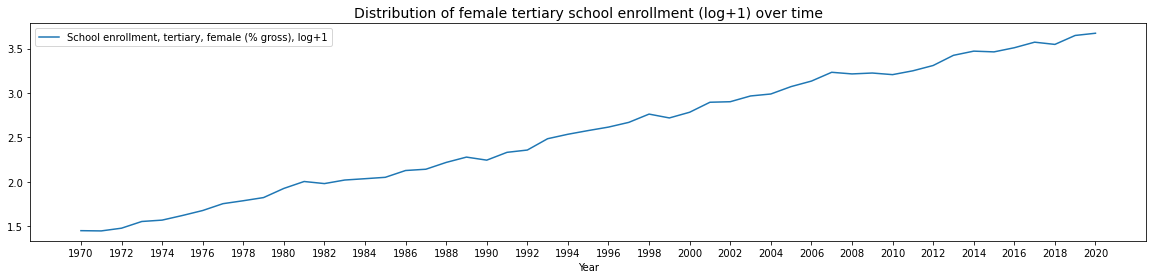

In [19]:
# Distribution over time
df_line = df.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'iso3'})
plt.figure(figsize=(20,4))
plt.xticks(np.arange(1970, 2021, 2))
plt.xlabel('Year')
plt.title('Distribution of female tertiary school enrollment (log+1) over time', fontsize=14)
plt.plot(df_line['year'], df_line['School_log'], label = "School enrollment, tertiary, female (% gross), log+1")
plt.legend()

Overall the graph shows an increasing trend, which is also in line with our assumption that female education is inversly related to fertility.

## Additional Explanatory Variable 1: Government expenditure on education, total (% of GDP)

In [20]:
df['Government'].describe()

count    5835.000000
mean        4.210247
std         1.567907
min         0.000000
25%         3.105870
50%         4.107300
75%         5.148935
max        10.100450
Name: Government, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83db0d880>]],
      dtype=object)

Text(0.5, 1.0, 'Government expenditure on education, total (% of GDP): ')

0.4447572715455764


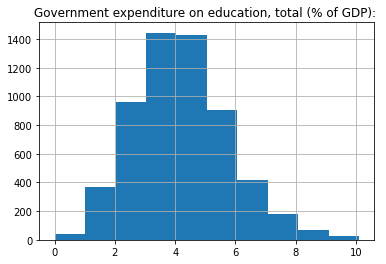

In [21]:
# Histogram and skewness of the variable
df.hist(column='Government')
plt.title("Government expenditure on education, total (% of GDP): ")
print(skew(df['Government'], nan_policy='omit'))

The skewness is within the threshold. The distribution is slightly asymmetric on the left.

In [22]:
# Spatial distribution
df_map = df.groupby(['iso3']).mean()
df_map.reset_index(inplace=True)
df_map = df_map.rename(columns = {'index':'iso3'})
fig = px.choropleth(df_map, locations='iso3',
                    locationmode='ISO-3',
                    color='Government', 
                    hover_name='iso3',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout( 
      title={                                
          'text': "Government expenditure on education, total (% of GDP)",
          'y':0.95,
          'x':0.43,
          'xanchor': 'center',
          'yanchor': 'top'})

We cannot draw a clear conclusion based on the map. We should keep in mind that these numbers represent just a % of GDP and not absolute values regarding education expenditure, therefore we can't expect a symmetric trend with GDP.

<Figure size 1440x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd83da45850>,
 <a list of 26 Text major ticklabel objects>)

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Government expenditure on education, total (% of GDP)')

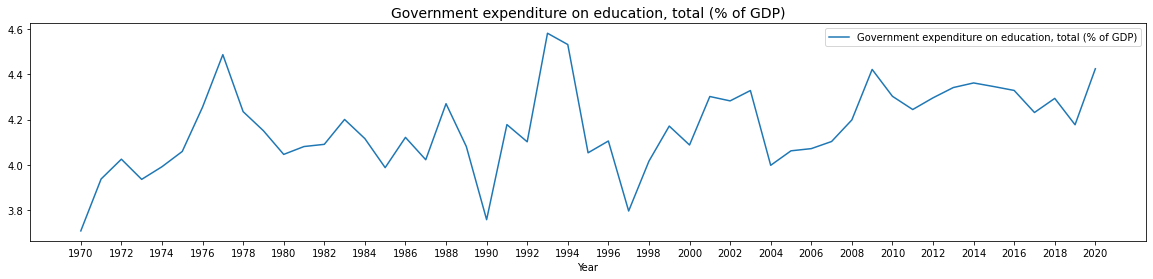

In [23]:
# Distribution over time
df_line = df.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'iso3'})
plt.figure(figsize=(20,4))
plt.xticks(np.arange(1970, 2021, 2))
plt.xlabel('Year')
plt.title('Government expenditure on education, total (% of GDP)', fontsize=14)
plt.plot(df_line['year'], df_line['Government'], label = "Government expenditure on education, total (% of GDP)")
plt.legend()

The plot of this variable doesn't show a clear trend.

## Additional Explanatory Variable 2: Contraceptive prevalence (% of women ages 15-49)

In [24]:
df['Contraceptive'].describe()

count    1334.000000
mean       46.551848
std        22.621141
min         0.800000
25%        26.900375
50%        49.700000
75%        65.490961
max        87.700000
Name: Contraceptive, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd83d962c70>]],
      dtype=object)

Text(0.5, 1.0, 'Contraceptive prevalence (% of women ages 15-49): ')

-0.19241492566768795


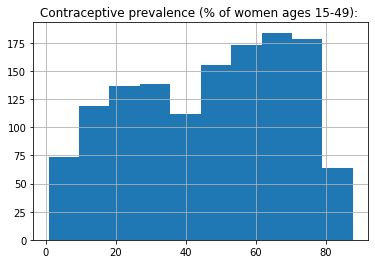

In [25]:
# Histogram and skewness for main explanatory variable
df.hist(column='Contraceptive')
plt.title("Contraceptive prevalence (% of women ages 15-49): ")
print(skew(df['Contraceptive'], nan_policy='omit'))

The skewness is within the threshold.

In [26]:
# Spatial distribution
df_map = df.groupby(['iso3']).mean()
df_map.reset_index(inplace=True)
df_map = df_map.rename(columns = {'index':'iso3'})
fig = px.choropleth(df_map, locations='iso3',
                    locationmode='ISO-3',
                    color='Contraceptive', 
                    hover_name='iso3',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout( 
      title={                                
          'text': "Contraceptive prevalence (% of women ages 15-49)",
          'y':0.95,
          'x':0.43,
          'xanchor': 'center',
          'yanchor': 'top'})

Most of the countries all over the world have high contraceptive prevalence, while African countries have relatively low values.

<Figure size 1440x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd83d8e8af0>,
 <a list of 26 Text major ticklabel objects>)

Text(0.5, 0, 'Year')

Text(0.5, 1.0, 'Contraceptive prevalence (% of women ages 15-49)')

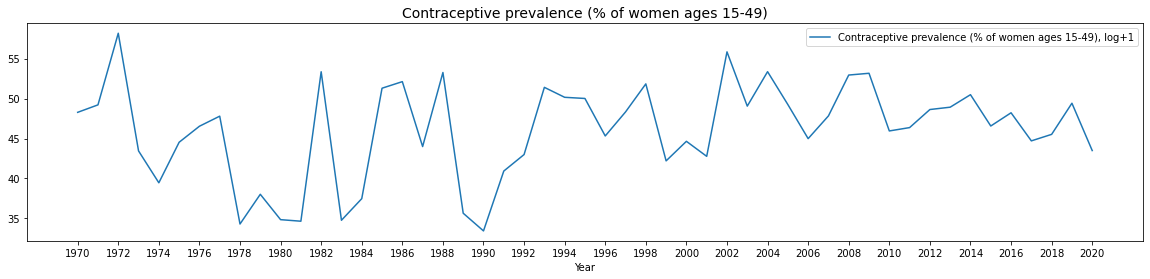

In [27]:
# Distribution over time
df_line = df.groupby(['year']).mean()
df_line.reset_index(inplace=True)
df_line = df_line.rename(columns = {'index':'iso3'})
plt.figure(figsize=(20,4))
plt.xticks(np.arange(1970, 2021, 2))
plt.xlabel('Year')
plt.title('Contraceptive prevalence (% of women ages 15-49)', fontsize=14)
plt.plot(df_line['year'], df_line['Contraceptive'], label = "Contraceptive prevalence (% of women ages 15-49), log+1")
plt.legend()

There is also no clear trend in this graph. However, it is possible to say that it started stabilising in the recent decades.

# Bivariate Analysis

In order to have a general understanding about the relation between education and fertility we decided to study the correlation coefficient and plot a first graph. It is possible to notice that the relationship seems to be strongly negative (-0.84). However, it is not possible to consider these results as true and relevant, as they are strongly biased by the presence of omitted variables and reverse causality. In particular, the latter is due to the choice of the level of education. In fact, teenagers’ fertility can decrease the tertiary education rate, as women who get pregnant while being teenagers are less likely to continue their studies after high school (Basch, 2011). Therefore, to have a clearer understanding about this association we decided to first include in our regressions new variables that can bias the results and continue studying fixed effects.   

In [28]:
# Correlation coefficient
df[['School_log', 'Fertility']].corr()

School_log  Fertility
School_log    1.000000  -0.841489
Fertility    -0.841489   1.000000

Text(0.5, 0, 'School enrollment, tertiary, female (% gross), log+1')

Text(0, 0.5, 'Fertility rate, total (births per woman)')

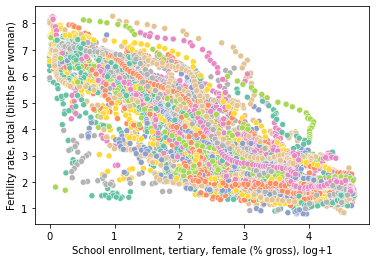

In [29]:
# Scatter plot by country
sns.scatterplot(x='School_log', y='Fertility', legend=False, hue='iso3', palette='Set2', data=df)
plt.xlabel('School enrollment, tertiary, female (% gross), log+1')
plt.ylabel('Fertility rate, total (births per woman)')

### Endogeneity Analysis

#### Omitted Variables

To cope with omitted variables, we decided to study the effect of government expenditure and of contraceptive by including these variables in the regression. 
First, we included government as we believed that countries with higher % expenditures on education may have a better education and therefore a higher % of women enrolled. 

From the following table, we can notice that the estimated coefficient of the education rate is expressed in logarithmic terms (School_log) and the correlation coefficient of fertility rate is -1.25, meaning that as education (school) increases by 100%, then fertility rate decreases by 1.25, which is a significant effect.

In column 2 we added the government expenditure in education, expressed as a % of the total public expenditures. It is possible to notice that the negative effect of education on fertility decreases, while government has a slight positive effect of 0.024 which is statistically significant at the 5% confidence level.
 As it is possible to notice from the table, the adjusted R-squared coefficient decreases when government expenditure is added, meaning that the new variable does not contribute significantly to the model's ability to explain the variance in the response variable.
We decided not to include it in our regression to not decrease the model's explanatory power.


In [30]:
ols_canned_results = sm.OLS.from_formula('Fertility ~ School_log', df).fit() 
ols_canned_results_tax = sm.OLS.from_formula('Fertility ~ School_log + Government', df).fit()
stargazer = Stargazer([ols_canned_results, ols_canned_results_tax]) 
stargazer

We decided to continue our analysis studying the effect of the contraceptive variable. Indeed, we thought that in a country with high contraceptive use female tertiary education is high and fertility rate is low. The following table shows that the inclusion of contraceptive use in our regression.

**Column 1** reports the simple regression results, with just education and fertility as variables considered. The coefficient estimates of -1.243 indicates that, on average, if female tertiary education increases by 100%, then fertility rate should decrease by -1.25. Moreover, this result is statistically significant at the 1% level. 
Looking at the adjusted R-squared, it is possible to state that education should explain around 70% of the change in fertility rate.

In order to decrease the bias due to omitted variables we included the contraceptive rate in **column 2**. The coefficient estimates of the education variable increased to -0.55, meaning that on average, if female tertiary education increases by 100%, then fertility rate should decrease by 0.5. The contraceptive use effect is estimated at -0.062. All the results are statistically significant at the 1% level. Looking at the adjusted R-squared, it is possible to state that the inclusion of the contraceptive variable increases the fit of our regression. 

Lastly, **column 3** also includes the interaction between female education rate and contraceptive. It is possible to notice that the coefficient estimates of the education variable decreased to -0.86 with respect to column 2, while the contraceptive use effect is decreased to -0. 062.The effect of the interaction is 0.007, meaning that if female tertiary education increases by 100%, then fertility rate should decrease by 0.863 plus 0.007 multiplied by the value of contraceptives. This value would change according to the contraceptive rate in the specific country and year. Also in this case, all the results are statistically significant at the 1% level. The adjusted R-squared increases in each step, indicating that contraception is a variable we should definitely include in our regression.




In [31]:
ols_canned_results = sm.OLS.from_formula('Fertility ~ School_log', df).fit() 
ols_canned_results_tax = sm.OLS.from_formula('Fertility ~ School_log + Contraceptive', df).fit()
ols_canned_results_tax1 = sm.OLS.from_formula('Fertility ~ School_log + Contraceptive + School_log*Contraceptive', df).fit()
stargazer = Stargazer([ols_canned_results, ols_canned_results_tax, ols_canned_results_tax1]) 
stargazer

#### Reverse Causality

In order to cope with reverse causality, we decided to control for time and country fixed effects. 

It is possible to notice that the coefficient estimates of the education variable drastically changed from the previous table. Indeed, if before it was -0.863, it became 0.0148 by controlling for fixed effects. The result is positive and still statistically significant, as the p-value is equal to 0.000, meaning that if female tertiary education increases by 100%, then fertility rate should increase by 0.0113.

In [32]:
# Creating a 2 level multi-index for PanelOLS, necessary step for it to process the dataframe
df_copy = df.copy()
df_copy = df_copy.set_index(['iso3', 'year'])
df_copy

# Specify the dependent and independent variables
y = df_copy['Fertility']
X = df_copy[['Contraceptive', 'School']]

# Fit the panel data regression model using PanelOLS
model = PanelOLS(y, X, entity_effects=True, time_effects=True) # entity and time effects are included
results = model.fit(cov_type='clustered')

print(results)

country   School  Government  Contraceptive  Fertility  School_log
iso3 year                                                                     
ABW  1970     Aruba      NaN         NaN            NaN      2.908         NaN
     1971     Aruba      NaN         NaN            NaN      2.788         NaN
     1972     Aruba      NaN         NaN            NaN      2.691         NaN
     1973     Aruba      NaN         NaN            NaN      2.613         NaN
     1974     Aruba      NaN         NaN            NaN      2.552         NaN
...             ...      ...         ...            ...        ...         ...
ZWE  2016  Zimbabwe  8.54473     5.47262            NaN      3.771    2.255989
     2017  Zimbabwe  9.68927     5.81878            NaN      3.706    2.369240
     2018  Zimbabwe      NaN     3.86611            NaN      3.659         NaN
     2019  Zimbabwe      NaN         NaN            NaN      3.599         NaN
     2020  Zimbabwe      NaN         NaN            NaN      3.545         NaN

[13566 rows x 6 columns]

/usr/local/lib/python3.8/dist-packages/linearmodels/panel/model.py:1183: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                          PanelOLS Estimation Summary                           
Dep. Variable:              Fertility   R-squared:                        0.4754
Estimator:                   PanelOLS   R-squared (Between):             -0.7954
No. Observations:                 847   R-squared (Within):               0.3905
Date:                Fri, Dec 23 2022   R-squared (Overall):             -0.7272
Time:                        21:58:55   Log-likelihood                   -101.91
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      270.54
Entities:                         198   P-value                           0.0000
Avg Obs:                       4.2778   Distribution:                   F(2,597)
Min Obs:                       1.0000                                           
Max Obs:                       23.000   F-statistic (robust):             140.89
                            


At the beginning the relationship fertility - education was negative, while by controlling for fixed effects it became positive (0.0098). These results are less biased than before, however, we still believe that further analysis needs to be conducted in order to verify the external validity of the estimates found. Indeed, as stated in the introduction these results have been interpreted in other paper as country specific. 


# Difference-in-Differences: US & UK

The difference-in-differences (DiD) method is a quasi-experimental approach that compares the changes in outcomes over time between a population enrolled in a program (the treatment group) and a population that is not (the control group). It is a useful tool for data analysis.

We choose DiD because we would like to solve the problem of external validity in the relation between female tertiary education and fertility rate. It means that we need to pick 2 countries with similar fertility trends before the policy implementation time and statistically different trends after the implementation time. We also have to regard one of them as the control group and the other as the treatment group in which the policy plays a role. 

To pick our 2 countries of interest for DiD, we first looked at education and then at the fertility trend of multiple countries with similar characteristics, such as culture, geography, religion, climate, and the like.<br>

In the following DiD, we look into the US and UK (see the Appendix for the other country pairs which we looked into but discarded from our main analysis, specifically Malta and Cyprus, Burundi and Rwanda). We focus on UK and US because:
1. The fertility trends of both countries are very similar until 1988.
2. There is high data availability for those 2 countries relative to other potential pairs we examined.
3. In the late 1970s, The UK implemented a number of policies regarding tertiary education. One significant policy development was the Education Act of 1976, which introduced a number of changes to the education system in England and Wales. The Act established the Open University, which is a distance learning institution that provides access to higher education for students who are unable to attend a traditional university. The Act also established the Further Education Funding Council (FEFC), which is responsible for funding and regulating further education in England and Wales. Further education includes education and training for students aged 16 and over who are not in higher education.

This policy increased the opportunities to be admitted to higher education for both men and women. However, as we will see later, the effects of these policies on fertility rate are not immediate. Indeed, the effect is observed a few years after the implementation of the policy. We choose 1988 as the starting point because we assume the effect of the education policies started to directly influence the fertility rate since then as shown by the following graphs. Moreover, we did not find any other strong policy implemented in 1980s directly aimed at regulating fertility rate.

## Trend in School Enrollment

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Trend in School Enrollment')

Text(0.5, 0, '')

Text(0, 0.5, 'School enrollment, tertiary, female (% gross), log+1')

([<matplotlib.axis.XTick at 0x7fd8375a5af0>,
 <a list of 16 Text major ticklabel objects>)

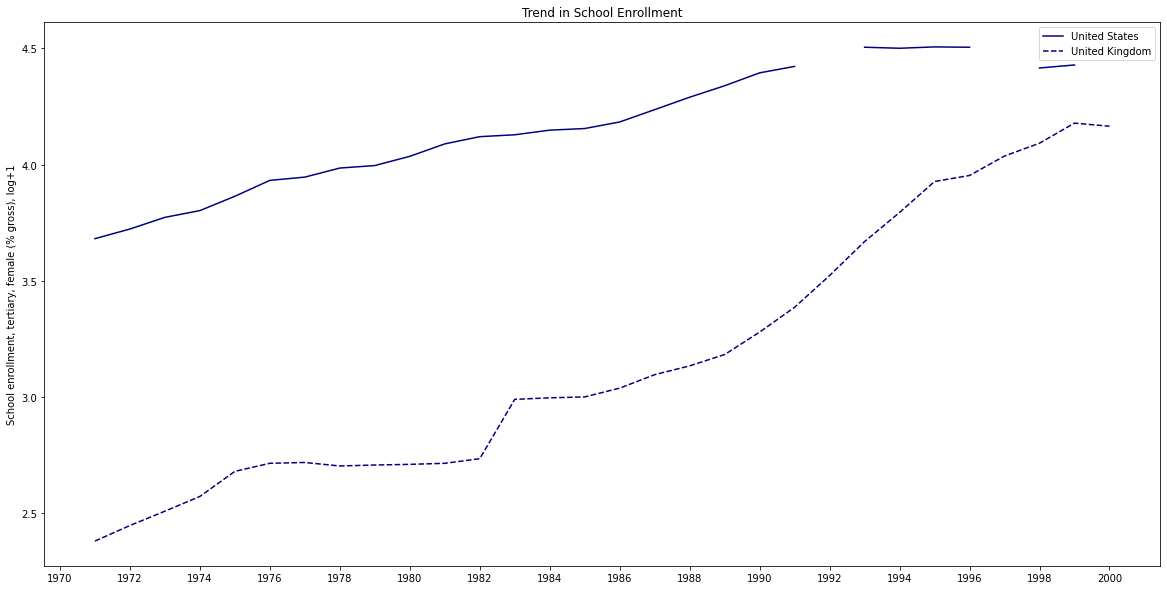

In [33]:
# Graphical representation
plt.figure(figsize=(20,10))

plt.plot(df[(df['iso3'] == 'USA')&(df['year'] <= 2000)]['year'],
         df[(df['iso3'] == 'USA')&(df['year'] <= 2000)]['School_log'],
         color = "navy",linestyle = '-', label = "United States")

plt.plot(df[(df['iso3'] == 'GBR')&(df['year'] <= 2000)]['year'],
         df[(df['iso3'] == 'GBR')&(df['year'] <= 2000)]['School_log'],
         color = "navy",linestyle = '--', label = "United Kingdom")
    
plt.title("Trend in School Enrollment")
plt.xlabel("")
plt.ylabel("School enrollment, tertiary, female (% gross), log+1")
plt.xticks(np.arange(1970, 2001, 2))
plt.legend()

plt.show()

This graph shows the female tertiary education enrollment trend since 1971 to 2000 in UK and US. We can notice that there is a faster increase after 1988 in the UK. 

## DiD Graph (Fertility)

In this experiment, we view the UK as the treatment group and US as the control group (even though they both seem abnormal concerning the trend). And we also narrow the observation period to 1970 to 2000 because other policies regarding education or fertility might have been implemented and we wish to focus on the specific period of the 80's.

To conduct DiD, firstly we need to picture a classical graph to clearly present the different trend of female tertiary education enrollement and fertility rates of both countries. We also take 1988 as the treatment time, in which case we need to see the trend before and after 1988.

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'DID')

Text(0.5, 0, '')

Text(0, 0.5, 'Fertility rate, total (births per woman)')

([<matplotlib.axis.XTick at 0x7fd837515340>,
 <a list of 16 Text major ticklabel objects>)

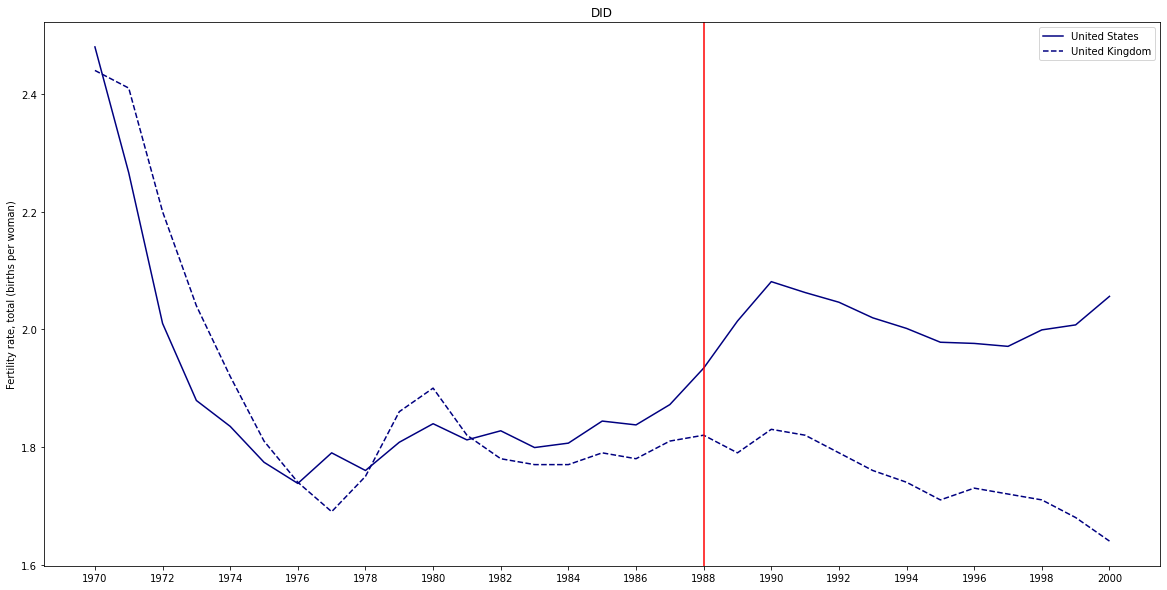

In [34]:
# Graphical representation
plt.figure(figsize=(20,10))

plt.plot(df[(df['iso3'] == 'USA')&(df['year'] <= 2000)]['year'],
         df[(df['iso3'] == 'USA')&(df['year'] <= 2000)]['Fertility'],
         color = "navy",linestyle = '-', label = "United States")

plt.plot(df[(df['iso3'] == 'GBR')&(df['year'] <= 2000)]['year'],
         df[(df['iso3'] == 'GBR')&(df['year'] <= 2000)]['Fertility'],
         color = "navy",linestyle = '--', label = "United Kingdom")
    
plt.title("DID")
plt.xlabel("")
plt.ylabel("Fertility rate, total (births per woman)")
plt.axvline(x=1988, ymin=0, ymax=6, color='red')
plt.xticks(np.arange(1970, 2001, 2))
plt.legend()

plt.show()

From the graph it appears that the 2 countries have parallel trends before 1988, but after that year, the fertility of US increases while that of the UK decreases. To further test the statistical difference in the two curves, we need to apply the PanelOLS model to the dataset and see if we can accept this assumption.

## DiD Formula Model

In this step, we need to test the statistical significance of DiD by using PanelOLS method. Firstly, we introduce two dummy variables to the dataset.

The first dummy variable is "post" which indicates the treatment time. First, we take 1988 as the treatment year, then we define all the years before and including 1988 as pre-treatment period (by assigning the value of 0) while the years after 1988 as post-treatment period (by assigning the value of 1).

The other dummy variable is "treat" which indicates  the treatment/control group. We take the UK as treatment group, so all the data about UK should have the "treat" variable with value of 1, while US should have the "treatment" variable with value of 0.

In [35]:
df_gu = df.loc[(df['iso3'] == 'GBR') | (df['iso3'] == 'USA')]
df_gu = df_gu[df_gu['year'] <= 2000]

df_gu['post'] = 0
df_gu['treat'] = 0

df_gu.loc[df_gu['year'] > 1988,'post'] = 1
df_gu.loc[df_gu['iso3'] == 'GBR','treat'] = 1
df_gu

iso3         country  year     School  Government  Contraceptive  \
611  GBR  United Kingdom  1970        NaN         NaN            NaN   
610  GBR  United Kingdom  1971   9.806930     5.03205            NaN   
609  GBR  United Kingdom  1972  10.555840     5.15938            NaN   
608  GBR  United Kingdom  1973  11.290820     5.44861            NaN   
607  GBR  United Kingdom  1974  12.095300     5.39100            NaN   
..   ...             ...   ...        ...         ...            ...   
534  USA   United States  1996  89.479500         NaN            NaN   
533  USA   United States  1997        NaN         NaN            NaN   
532  USA   United States  1998  81.755531         NaN            NaN   
531  USA   United States  1999  82.833099         NaN            NaN   
530  USA   United States  2000        NaN         NaN            NaN   

     Fertility  School_log  post  treat  
611     2.4400         NaN     0      1  
610     2.4100    2.380188     0      1  
609     2.2000    2.447191     0      1  
608     2.0400    2.508853     0      1  
607     1.9200    2.572253     0      1  
..         ...         ...   ...    ...  
534     1.9760    4.505123     1      0  
533     1.9710         NaN     1      0  
532     1.9990    4.415891     1      0  
531     2.0075    4.428828     1      0  
530     2.0560         NaN     1      0  

[62 rows x 10 columns]

In [36]:
# Set the index for fixed effects, and creating a multi-index for the 
# PanelOLS function to work

df_gu['id'] = df_gu['treat']
df_gu['t'] = df_gu['year']
df_gu.reset_index(inplace=True)
df_gu = df_gu.set_index(['id', 't'])
df_gu

index iso3         country  year     School  Government  \
id t                                                               
1  1970    611  GBR  United Kingdom  1970        NaN         NaN   
   1971    610  GBR  United Kingdom  1971   9.806930     5.03205   
   1972    609  GBR  United Kingdom  1972  10.555840     5.15938   
   1973    608  GBR  United Kingdom  1973  11.290820     5.44861   
   1974    607  GBR  United Kingdom  1974  12.095300     5.39100   
...        ...  ...             ...   ...        ...         ...   
0  1996    534  USA   United States  1996  89.479500         NaN   
   1997    533  USA   United States  1997        NaN         NaN   
   1998    532  USA   United States  1998  81.755531         NaN   
   1999    531  USA   United States  1999  82.833099         NaN   
   2000    530  USA   United States  2000        NaN         NaN   

         Contraceptive  Fertility  School_log  post  treat  
id t                                                        
1  1970            NaN     2.4400         NaN     0      1  
   1971            NaN     2.4100    2.380188     0      1  
   1972            NaN     2.2000    2.447191     0      1  
   1973            NaN     2.0400    2.508853     0      1  
   1974            NaN     1.9200    2.572253     0      1  
...                ...        ...         ...   ...    ...  
0  1996            NaN     1.9760    4.505123     1      0  
   1997            NaN     1.9710         NaN     1      0  
   1998            NaN     1.9990    4.415891     1      0  
   1999            NaN     2.0075    4.428828     1      0  
   2000            NaN     2.0560         NaN     1      0  

[62 rows x 11 columns]

The following table shows a comparison between UK and US between 1988 and 2000. The coefficient β3 (post:treat), that describe the DiD, is significant and different from zero, which means that the implementation of a policy which aims at improving education conditions has a negative effect on the fertility rate. Particularly, the fertility rate decreases by 0.284 more than it would have without the education policy.

In [37]:
reg1 = PanelOLS.from_formula("Fertility ~ post*treat+1", df_gu)
res = reg1.fit(cov_type = 'clustered') # cluster_entity=True, cluster_time=True
res

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              Fertility   R-squared:                        0.2304
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  62   R-squared (Within):               0.1648
Date:                Fri, Dec 23 2022   R-squared (Overall):              0.2304
Time:                        21:58:56   Log-likelihood                    26.956
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.7891
Entities:                           2   P-value                           0.0016
Avg Obs:                       31.000   Distribution:                    F(3,58)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):             67.927
                                        P-value                           0.0000
Time periods:                      31   Distribution:                    F(3,58)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      1.8901     0.0426     44.395     0.0000      1.8049      1.9753
post           0.1276     0.0438     2.9109     0.0051      0.0398      0.2153
treat          0.0099     0.0660     0.1499     0.8814     -0.1222      0.1420
post:treat    -0.2842     0.0688    -4.1330     0.0001     -0.4219     -0.1466
==============================================================================


PanelEffectsResults, id: 0x7fd837571a60

## Placebo Test

The placebo test is meant to examine the accuracy of the treatment time. Although we assume that the treatment in 1988 causes the difference in trends of the two countries after 1988, we need to study the effect of an hypothetical policy before 1988, to show that the effect does not exist when it “should not” exist(Gelman Andrew, 2018). The placebo test requires us to choose a short period before 1988, and reset the value of original "post" variable to 1 while others to 0 (meaning setting this period as a new treatment period) and see if there is still a statistically significant difference in the two trends after this new period. If not, we can conclude that 1988 is the accurate treatment period.

In [38]:
df_placebo = df_gu.loc[df_gu['year'] <= 1988,:]
df_placebo.loc[df_placebo['year'] >1985,'post'] = 1
df_placebo

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index iso3         country  year     School  Government  \
id t                                                               
1  1970    611  GBR  United Kingdom  1970        NaN         NaN   
   1971    610  GBR  United Kingdom  1971   9.806930     5.03205   
   1972    609  GBR  United Kingdom  1972  10.555840     5.15938   
   1973    608  GBR  United Kingdom  1973  11.290820     5.44861   
   1974    607  GBR  United Kingdom  1974  12.095300     5.39100   
   1975    606  GBR  United Kingdom  1975  13.588710     6.26878   
   1976    605  GBR  United Kingdom  1976  14.103780     6.42422   
   1977    604  GBR  United Kingdom  1977  14.155720     6.06335   
   1978    603  GBR  United Kingdom  1978  13.930270         NaN   
   1979    602  GBR  United Kingdom  1979  13.992430         NaN   
   1980    601  GBR  United Kingdom  1980  14.034880     5.07012   
   1981    600  GBR  United Kingdom  1981  14.101590     5.28842   
   1982    599  GBR  United Kingdom  1982  14.406040     5.18870   
   1983    598  GBR  United Kingdom  1983  18.887381     5.06150   
   1984    597  GBR  United Kingdom  1984  19.018221     4.89906   
   1985    596  GBR  United Kingdom  1985  19.095970     4.59409   
   1986    595  GBR  United Kingdom  1986  19.870710     4.38084   
   1987    594  GBR  United Kingdom  1987  21.114759     4.37181   
   1988    593  GBR  United Kingdom  1988  21.968840     4.26831   
0  1970    560  USA   United States  1970        NaN         NaN   
   1971    559  USA   United States  1971  38.703758         NaN   
   1972    558  USA   United States  1972  40.385880         NaN   
   1973    557  USA   United States  1973  42.518150         NaN   
   1974    556  USA   United States  1974  43.798080         NaN   
   1975    555  USA   United States  1975  46.649761         NaN   
   1976    554  USA   United States  1976  50.024090         NaN   
   1977    553  USA   United States  1977  50.742401         NaN   
   1978    552  USA   United States  1978  52.802670         NaN   
   1979    551  USA   United States  1979  53.383190         NaN   
   1980    550  USA   United States  1980  55.584030         NaN   
   1981    549  USA   United States  1981  58.695599         NaN   
   1982    548  USA   United States  1982  60.578732         NaN   
   1983    547  USA   United States  1983  61.081429         NaN   
   1984    546  USA   United States  1984  62.326908         NaN   
   1985    545  USA   United States  1985  62.773819         NaN   
   1986    544  USA   United States  1986  64.602013         NaN   
   1987    543  USA   United States  1987  68.171349         NaN   
   1988    542  USA   United States  1988  71.972137         NaN   

         Contraceptive  Fertility  School_log  post  treat  
id t                                                        
1  1970            NaN     2.4400         NaN     0      1  
   1971            NaN     2.4100    2.380188     0      1  
   1972            NaN     2.2000    2.447191     0      1  
   1973            NaN     2.0400    2.508853     0      1  
   1974            NaN     1.9200    2.572253     0      1  
   1975            NaN     1.8100    2.680248     0      1  
   1976            NaN     1.7400    2.714945     0      1  
   1977            NaN     1.6900    2.718378     0      1  
   1978            NaN     1.7500    2.703391     0      1  
   1979            NaN     1.8600    2.707545     0      1  
   1980            NaN     1.9000    2.710373     0      1  
   1981            NaN     1.8200    2.714800     0      1  
   1982            NaN     1.7800    2.734760     0      1  
   1983            NaN     1.7700    2.990085     0      1  
   1984            NaN     1.7700    2.996643     0      1  
   1985            NaN     1.7900    3.000519     0      1  
   1986           81.0     1.7800    3.038347     1      1  
   1987            NaN     1.8100    3.096245     1      1  
   1988            NaN     1.8200    3.134138     1      1  
0  1970

The following table studies the parallel-trend assumption, which states that if no treatment had occurred, the difference between the treated group and the untreated group would have stayed the same in the post-treatment period as it was in the pre-treatment period (Huntington-Klein, 2022). In particular, we can see that β3 (post*treat) has a value of -0.1, which is not statistically significant (the p-value > 0.05 indicates there are no DiD effects).

In [39]:
reg2 = PanelOLS.from_formula("Fertility ~ post*treat+1", df_placebo)
ress = reg2.fit(cov_type = 'clustered')
ress

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              Fertility   R-squared:                        0.0234
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  38   R-squared (Within):               0.0228
Date:                Fri, Dec 23 2022   R-squared (Overall):              0.0234
Time:                        21:58:57   Log-likelihood                    8.2959
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.2720
Entities:                           2   P-value                           0.8452
Avg Obs:                       19.000   Distribution:                    F(3,34)
Min Obs:                       19.000                                           
Max Obs:                       19.000   F-statistic (robust):             4.4992
                                        P-value                           0.0092
Time periods:                      19   Distribution:                    F(3,34)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      1.8918     0.0515     36.747     0.0000      1.7872      1.9964
post          -0.0106     0.0570    -0.1864     0.8533     -0.1264      0.1051
treat          0.0263     0.0791     0.3332     0.7411     -0.1343      0.1870
post:treat    -0.1042     0.0834    -1.2493     0.2201     -0.2736      0.0653
==============================================================================


PanelEffectsResults, id: 0x7fd83745dee0

To supplement the placebo test above, we combine the consecutive years before 1988 in couples. These combinations can be seen as separate new treatment periods. We need to examine the statistically significant difference of each combination. 

The following scatterplot shows the p-value and parameter of β3(post:treat) in each combination, and indicates that the p-values of all combinations are larger than 0.05. This means that there are no DiD effects during each period and the trends of fertility rate are relatively parallel before 1988.

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Placebo Test for Each 3-year Period Before the Treatment')

Text(0.5, 0, 'Parameter of post:treat')

Text(0, 0.5, 'P-value of post:treat')

Text(0.10462500000000184, 0.4483349000468637, '1970-1972')

Text(0.18418749999999962, 0.22274819964315862, '1971-1973')

Text(0.16083333333333294, 0.16373670654928163, '1972-1974')

Text(0.09987499999999944, 0.3295777718041073, '1973-1975')

Text(0.036937499999999464, 0.6945814202528253, '1974-1976')

Text(-0.03629166666666726, 0.6641267927228416, '1975-1977')

Text(-0.05450000000000059, 0.4905603152790743, '1976-1978')

Text(-0.03470833333333388, 0.6986156574009441, '1977-1979')

Text(0.028822916666666167, 0.7503133764866015, '1978-1980')

Text(0.0359479166666662, 0.6650813242767111, '1979-1981')

Text(-0.0034375000000004745, 0.9679920303007485, '1980-1982')

Text(-0.038864583333333834, 0.6291238425010626, '1981-1983')

Text(-0.05647916666666721, 0.47586251791410006, '1982-1984')

Text(-0.05905208333333397, 0.4610750259482743, '1983-1985')

Text(-0.07033333333333393, 0.38036806305437953, '1984-1986')

Text(-0.08042708333333395, 0.3203203854072618, '1985-1987')

Text(-0.10417708333333389, 0.22009383523158288, '1986-1988')

([<matplotlib.axis.YTick at 0x7fd83750b7f0>,
 <a list of 20 Text major ticklabel objects>)

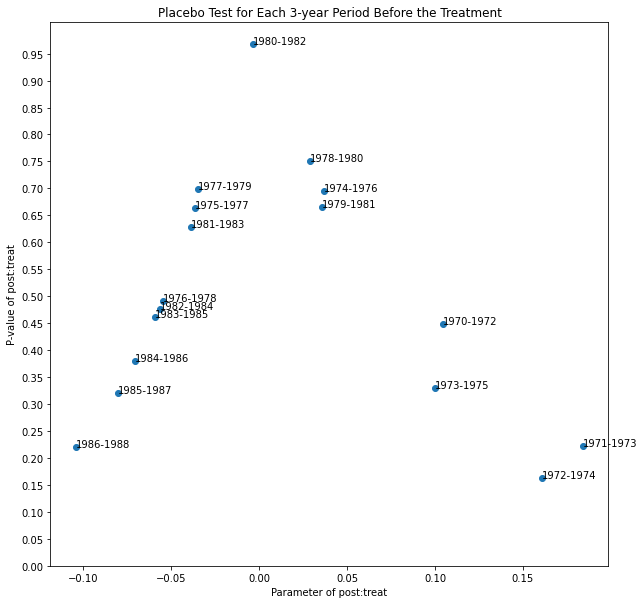

In [56]:
df_placebo_new = df_gu.loc[df_gu['year'] <= 1988,:]

def random_year(data,year):
    data2 = data.copy(deep=True)
    data2.loc[(data['year'] >=year)&(data['year'] <=year+2),'post'] = 1 # we use every 2-year period before 1988 to set a new treatment period
    return data2

def get_a_result(data, year):
    model = PanelOLS.from_formula("Fertility ~ post*treat+1", data)
    result = model.fit(cov_type = 'clustered')
    return {'year': str(year) + '-' + str(year+2),
            'pvalue': result.pvalues[3],
            'beta': result.params[3],
            'se': result.std_errors[3]}

def work(data, start, end):
    li = []
    for year in range(start, end):
        data2 = random_year(data, year)
        li.append(get_a_result(data2, year))
        # data = data.reset_index()
    df = pd.DataFrame(li)
    return df

start = 1970
end = 1987
df_placebo_random = work(df_placebo_new, start, end)


plt.figure(figsize=(10,10))
plt.title("Placebo Test for Each 3-year Period Before the Treatment")
plt.xlabel("Parameter of post:treat")
plt.ylabel("P-value of post:treat")
plt.scatter(df_placebo_random.beta, df_placebo_random.pvalue)
for i in range(len(df_placebo_random.values)):
    plt.annotate(df_placebo_random.year[i], xy = (df_placebo_random.beta[i],df_placebo_random.pvalue[i]),xytext = (df_placebo_random.beta[i],df_placebo_random.pvalue[i]))
plt.yticks(np.arange(0,1,0.05))
plt.show()

# Conclusion and Outlook

Our analysis showcased that the impact of female school enrollment at the tertiary level on fertility is not clear on a global level. Although our analysis of US and the UK demonstrated a negative relationship, other country pairs such as Rwanda-Burundi (in the Appendix) showed a positive relationship. Indeed, our analysis revealed that there are many biases that can alter the estimates of this relationship. For instance, there are many other omitted variables that are potentially influencing this relationship. Some of these are mentioned in literature (Jungho Kim, 2016): first the level of health of women in a given country or region, which influences their physical capacity to give birth; women's ability to control birth, which is especially relevant in countries where women are given limited freedom in society. This in turn is related to the level of education of women, as such ability can be related to access to information regarding the use of contraceptives. Another variable is the number of desired children per woman, which can be the result of the level of education, the cultural background or total number of effective natality policies in place. Most importantly, in our literature review authors admit that although each of those potential factors affecting fertility works in certain settings, the relative importance of each one is unknown. Different authors also suggested that this relative importance may additionally change along a country’s economic development process.

During our research, many hindrances were encountered, first of all was data availability per country, even from a large database such as the World Bank's, which partially restricted our choice of variables, for instance in the choice of the US and UK. A second limitation is the presence of many omitted variables that likely influence the relationship of research question. Literature research showed that the latter is very likely multi-causal, meaning that aside from education many other interacting factors influence fertility, and that such factors differ depending on the country looked at, meaning that establishing a global relationship is even less evident.

To counteract the multi-functoriality problem, we researched for a potential policy shock that could reveal a direct and potentially significant relationship between our 2 main variables in the DID. Nevertheless, the data availability issues (countries where there seemed some policy shock also lacked data, impeding further investigation) and/or no clear presence of a single shock to link the relationship, did not allows us to confirm a causal relationship.

Further research suggestion would be to investigate the recent development in Afghanistan in education, where the Taliban banned women from attending universities. This event caused a huge infringement of human rights; indeed, it constitutes a shock for the female tertiary education enrollment. Hence, it may be used in order to conduct further studies on the education – fertility rate relation in some years.

# References

<ol>
<li>Ali, Fatma Romeh M., and Shiferaw Gurmu. "The impact of female education on fertility: A natural experiment from Egypt." Review of Economics of the Household 16.3 (2018): 681-712.</li>

<li>Alvarez Pablo, “How Much Has the Global Fertility Rate Decreased Over the Years?” World Economic Forum, 14 July 2022, URL: https://www.weforum.org/agenda/2022/06/global-decline-of-fertility-rates-visualised/</li>

<li>Basch Charles, 2011, “Teen pregnancy and the achievement gap among urban minority youth“, Journal of School Health, 81(10), 614-618. URL: https://onlinelibrary.wiley.com/doi/full/10.1111/j.1746-1561.2011.00635.x</li>

<li>Bharati, Tushar, Simon Chang, and Qing Li. "The Effect of Tertiary Education Expansion on Fertility: A Note on Identification." (2021).</li>

<li>Bongaarts, John, et al. “Trends in the Age at Reproductive Transitions in the Developing World: The Role of Education.” Population Studies, vol. 71, no. 2, Informa UK Limited, Apr. 2017, pp. 139–54. https://doi.org/10.1080/00324728.2017.1291986.</li>

<li>Brand, Jennie E., and Dwight Davis. “The Impact of College Education on Fertility: Evidence for Heterogeneous Effects.” Demography, vol. 48, no. 3, Duke UP, July 2011, pp. 863–87. https://doi.org/10.1007/s13524-011-0034-3.</li>

<li>Cambridge Dictionary. Tertiary - Definizione, Significato, Pronuncia Audio, Sinonimi E Più Ancora. Che Cosa È Tertiary? 1. Relating to a Third Level or Stage 2. Relating to Education in Colleges and Universities: 3. A…: Vedi Di Più Ancora Nel Dizionario Inglese - Cambridge Dictionary. 7 Dec. 2022, dictionary.cambridge.org/it/dizionario/inglese/tertiary.</li>

<li>Chen, Jiwei, and Jiangying Guo. “The Effect of Female Education on Fertility: Evidence From China’s Compulsory Schooling Reform.” Economics of Education Review, vol. 88, Elsevier BV, June 2022, p. 102257. https://doi.org/10.1016/j.econedurev.2022.102257.</li>

<li> Gelman Andrew, 2018,  A Potential Big Problem With Placebo Tests in Econometrics: They’re Subject to the “Difference Between Significant and Non-significant Is Not Itself Statistically Significant” Issue | Statistical Modeling, Causal Inference, and Social Science. 26 Sept. 2018, statmodeling.stat.columbia.edu/2018/09/26/potential-big-problem-placebo-tests-econometrics-theyre-subject-difference-significant-non-significant-not-statistically-significant-issue.</li>

<li>Günes, Pınar Mine. The impact of female education on fertility: Evidence from Turkey. Grand Challenges Canada Working Paper GCC 13-01, 2013.</li>

<li> Huntington-Klein, Nick. The Effect. 1st ed., Routledge, 2022.</li>

<li>Jungho Kim. “Female Education and Its Impact on Fertility.” IZA World of Labor, Forschungsinstitut zur Zukunft der Arbeit GmbH, 2016, https://doi.org/10.15185/izawol.228.</li>

<li> NAIROBI, SEOUL AND TORODI, 2019, “Thanks to education, global fertility could fall faster than expected”, The Economist. URL: https://www.economist.com/international/2019/02/02/thanks-to-education-global-fertility-could-fall-faster-than-expected </li>

<li>Upadhyay, Ushma D., et al. “Women’s Empowerment and Fertility: A Review of the Literature.” Social Science &Amp; Medicine, vol. 115, Elsevier BV, Aug. 2014, pp. 111–20. https://doi.org/10.1016/j.socscimed.2014.06.014.</li>
</ol>


# Appendix

## Burundi & Rwanda


### Exploration of School Enrollment

In order to choose the countries subject to the difference in difference analysis, we started by analyzing the picks in the change of female tertiary education enrollment. 

In [41]:
# Creating a percentage change column for the School variable, more conveninent 
# to see extreme changes and hence to select countries where something potentially 
# interesting happened.
s2 = df['School_log'].pct_change()
s2.name = 'School_log % change'
df = pd.concat([df, s2], axis=1)
df

iso3   country  year   School  Government  Contraceptive  Fertility  \
10607  ABW     Aruba  1970      NaN         NaN            NaN      2.908   
10606  ABW     Aruba  1971      NaN         NaN            NaN      2.788   
10605  ABW     Aruba  1972      NaN         NaN            NaN      2.691   
10604  ABW     Aruba  1973      NaN         NaN            NaN      2.613   
10603  ABW     Aruba  1974      NaN         NaN            NaN      2.552   
...    ...       ...   ...      ...         ...            ...        ...   
4      ZWE  Zimbabwe  2016  8.54473     5.47262            NaN      3.771   
3      ZWE  Zimbabwe  2017  9.68927     5.81878            NaN      3.706   
2      ZWE  Zimbabwe  2018      NaN     3.86611            NaN      3.659   
1      ZWE  Zimbabwe  2019      NaN         NaN            NaN      3.599   
0      ZWE  Zimbabwe  2020      NaN         NaN            NaN      3.545   

       School_log  School_log % change  
10607         NaN                  NaN  
10606         NaN                  NaN  
10605         NaN                  NaN  
10604         NaN                  NaN  
10603         NaN                  NaN  
...           ...                  ...  
4        2.255989            -0.027445  
3        2.369240             0.050200  
2             NaN             0.000000  
1             NaN             0.000000  
0             NaN             0.000000  

[13566 rows x 9 columns]

<Figure size 7200x7200 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd837458820>,
 <a list of 26 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x7fd8373e6f10>,
 <a list of 16 Text major ticklabel objects>)

Text(0.5, 1.0, 'Distribution of school enrollment rate over time')

Text(0.5, 0, 'Year')

(array([-2,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
 <a list of 16 Text major ticklabel objects>)

(array([1970, 1972, 1974, 1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990,
        1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
        2014, 2016, 2018, 2020]), <a list of 26 Text major ticklabel objects>)

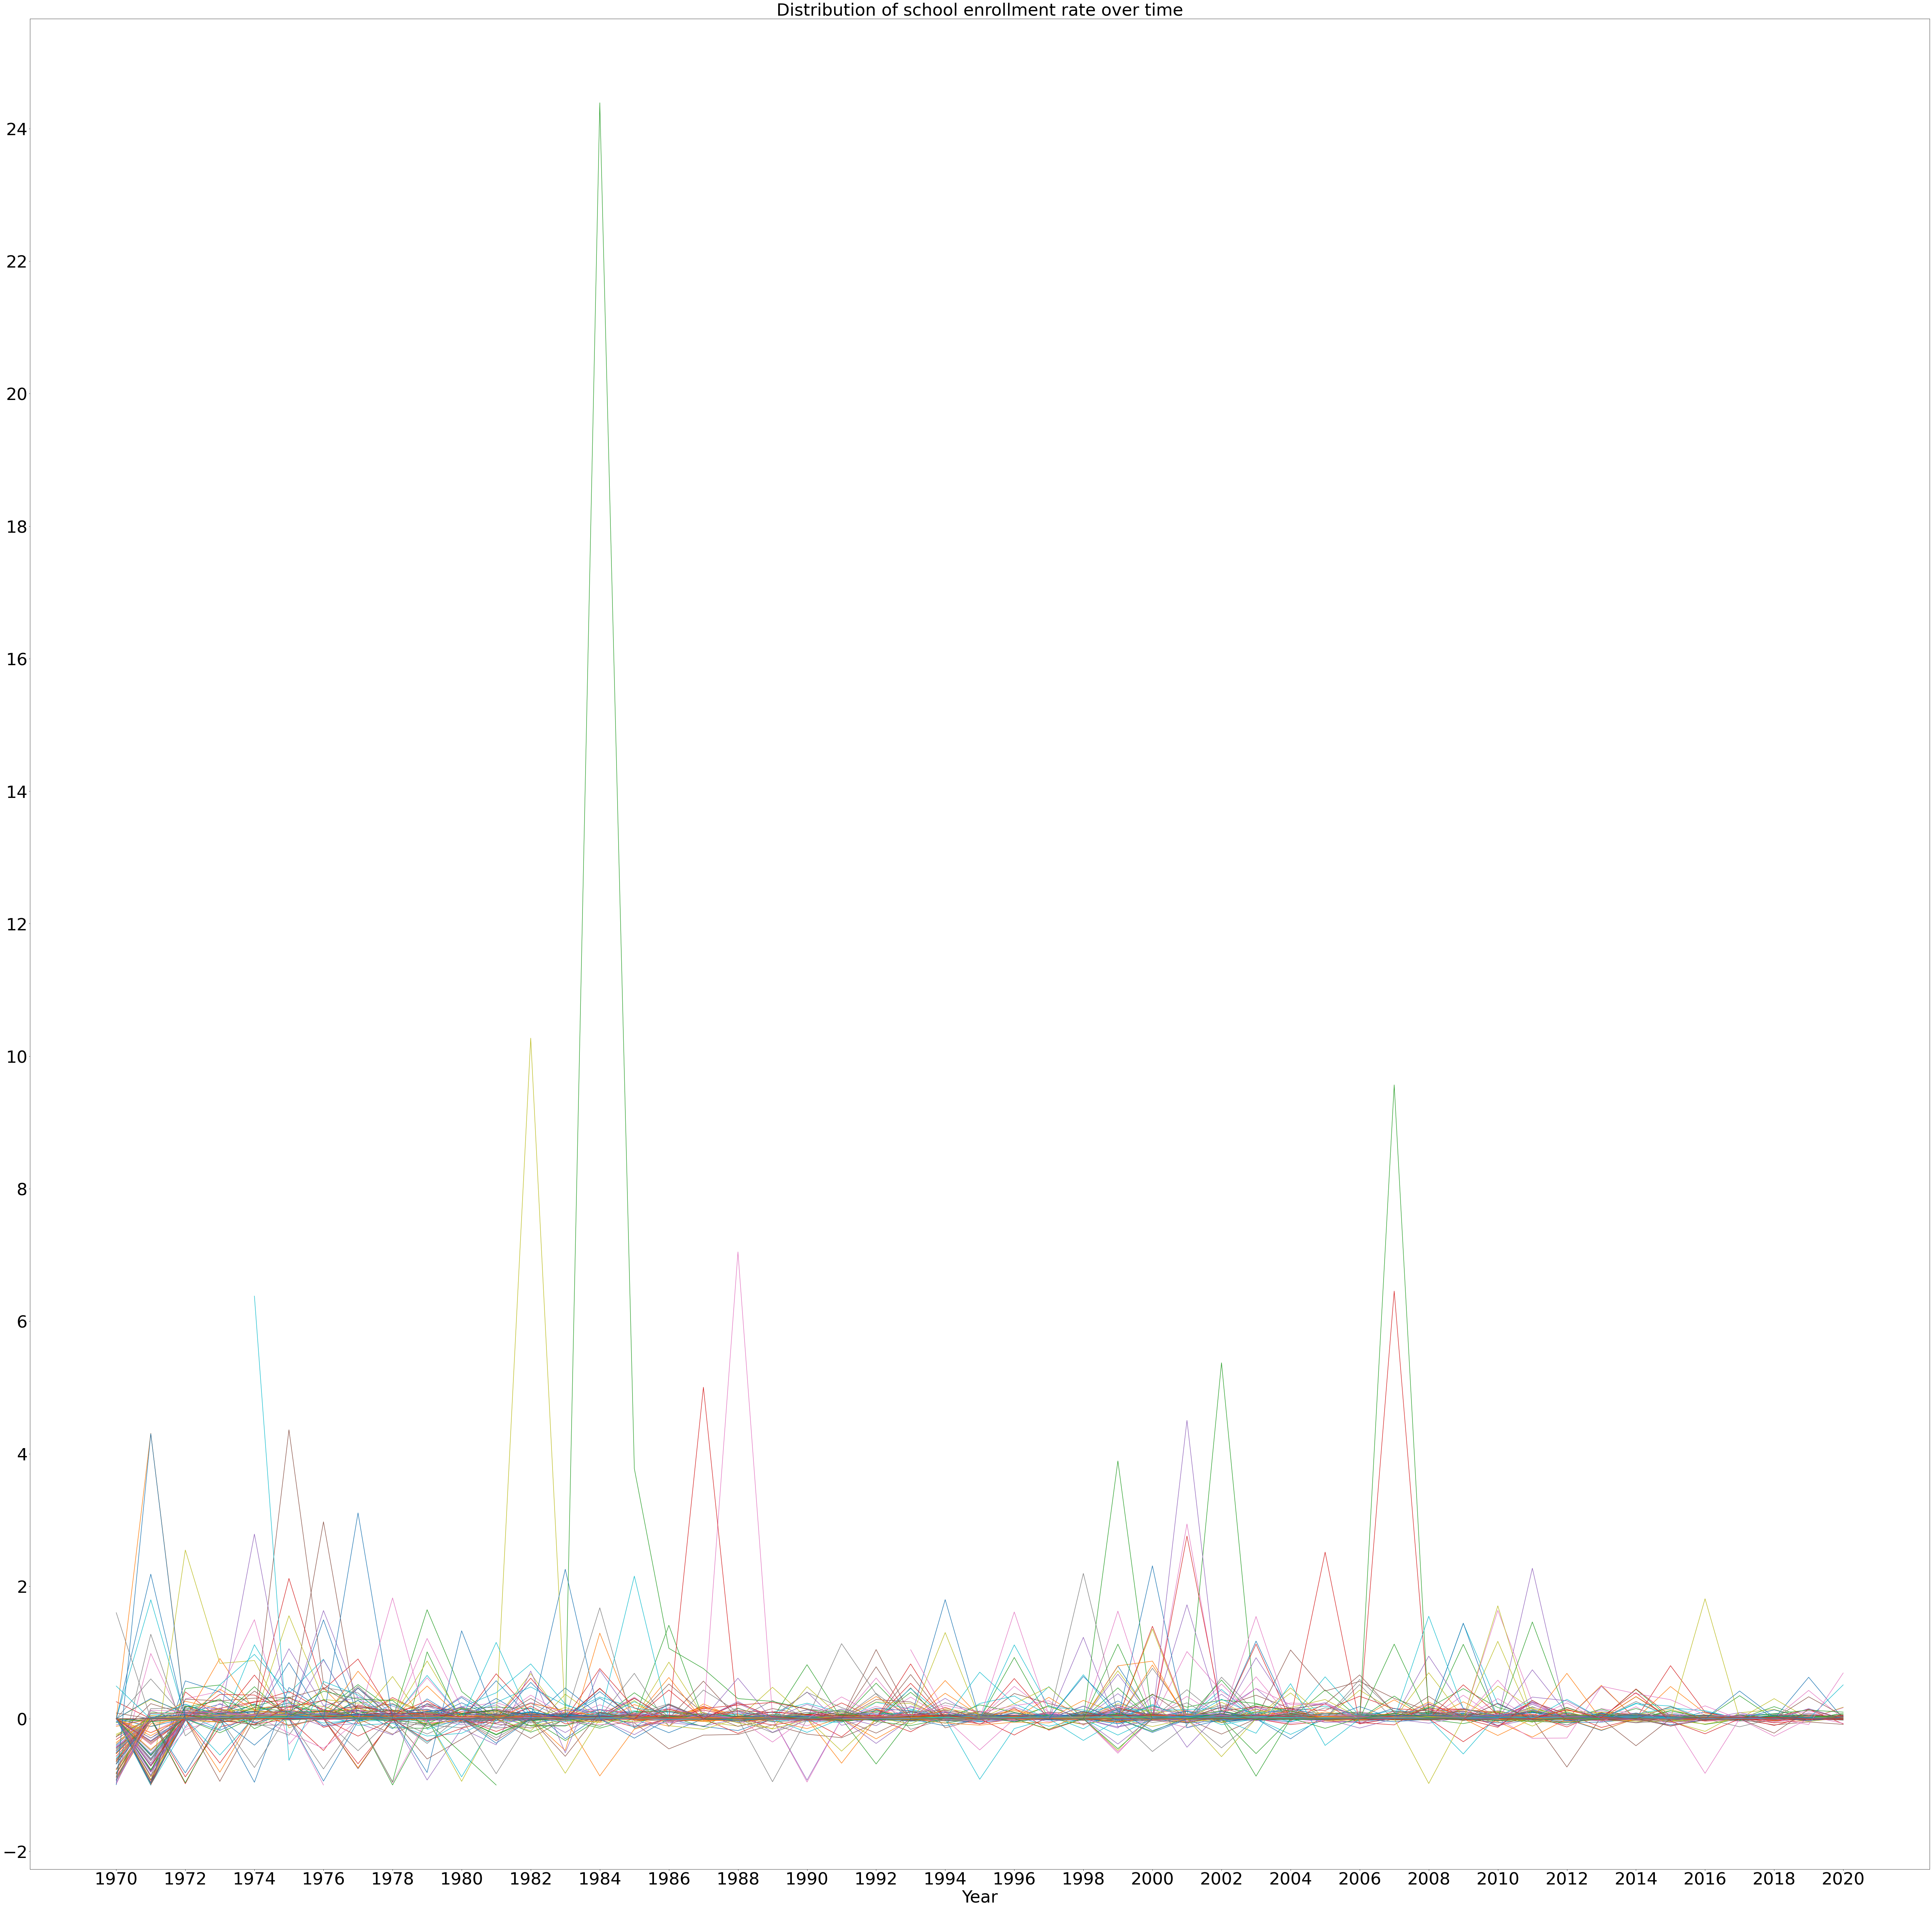

In [42]:
# Display the variable, to spot higher than usual values
iso3 = df['iso3'].unique().tolist()
plt.figure(figsize=(100,100))
plt.xticks(np.arange(1970, 2021, 2))
plt.yticks(np.arange(-2, 30, 2))
plt.title('Distribution of school enrollment rate over time',fontsize=50)
plt.xlabel('Year',fontsize=50)
plt.yticks(size = 50)
plt.xticks(size = 50)
for country in iso3:
    df2 = df[df['iso3'] == country]
    plt.plot(df2['year'],df2['School_log % change'],label = country)

From the latter graph, we studied the countries with the highest picks and noted that many of them are of small countries and islands where a relative increase or decrease in education enrollment can drive big shocks. Moreover, many countries are situated in Africa, where the education enrollment rate is still lower than in other continents. We analyzed few countries and we decided to pick Burundi due to the lack of scarcity of data in the other nations. Consequently, we tried to search for a country with similar characteristics and we found that Rwanda, a country situated at the south of Burundi, provided many similarities with Burundi, such as the population, 12.26 million in Burundi and 13.28 million in Rwanda and cultural similarities due to the proximity of the two countries.


Therefore, we decided to graphically represent the female tertiary education enrollment rate in the two countries to have a better overview of the trend. As it is possible to notice, the two countries have a similar trend until 1974. However, right after that year Burundi started to experience an increase in female tertiary education enrollment rate while Rwanda remained constant. We would like to restrict our analysis from 1970 to 1992 in order to study the specific effects of a policy regarding education that was implemented in Burundi in 1973.This post-independence reform of 1973 (Burundi became independent in 1962) constituted a major and radical departure, aiming ensure that “the vast majority of Burundi children who lived in rural areas (over 90 per cent) and who would not reach secondary school (90 per cent of them), would have access to an education useful to them and to the development of their country. It also had the role of preparing learners for secondary studies. The reform focused on nationalizing the education system, relevance and efficiency.” (Obura, 2008)


In [43]:
# Selecting countries, one with higher than usual value and a similar one for 
# comparison, based on data availability

df[(df['School_log % change'] < 4) & (df['School_log % change'] > 1)]
df[df['iso3'] == 'BDI'] # data availability highest for highest school_log % change
df[df['iso3'] == 'RWA'] # a similar country to Burundi, especially where also a 
# genocide happened, hence potentially mitigating the impact of such a big event 
# on the outcome variable

iso3      country  year   School  Government  Contraceptive  Fertility  \
11027  AFG  Afghanistan  2009  1.41213     3.73000            NaN      6.235   
10783  AGO       Angola  1998  0.44855     2.56712            NaN      6.732   
10770  AGO       Angola  2011  3.32261     3.03000            NaN      6.120   
9481   BDI      Burundi  1974  0.08833         NaN            NaN      7.222   
9476   BDI      Burundi  1979  0.14785     2.80336            NaN      7.307   
...    ...          ...   ...      ...         ...            ...        ...   
277    VNM      Vietnam  1998  7.75272         NaN           71.9      2.169   
2746   WSM        Samoa  1977  0.97826         NaN            NaN      6.378   
2740   WSM        Samoa  1983  3.05379         NaN            NaN      5.531   
123    YEM  Yemen, Rep.  1999  4.68687         NaN            NaN      6.511   
97     ZMB       Zambia  1974  0.53205     4.87801            NaN      7.376   

       School_log  School_log % change  
11027    0.880510             1.123099  
10783    0.370563             1.229158  
10770    1.463859             2.271644  
9481     0.084644             1.495544  
9476     0.137891             1.212051  
...           ...                  ...  
277      2.169364             2.193378  
2746     0.682218             3.106876  
2740     1.399652             2.255978  
123      1.738160             1.125272  
97       0.426607             2.787014  

[63 rows x 9 columns]

iso3  country  year   School  Government  Contraceptive  Fertility  \
9485  BDI  Burundi  1970      NaN         NaN            NaN      7.214   
9484  BDI  Burundi  1971  0.01863         NaN            NaN      7.213   
9483  BDI  Burundi  1972  0.02427         NaN            NaN      7.210   
9482  BDI  Burundi  1973  0.03450         NaN            NaN      7.215   
9481  BDI  Burundi  1974  0.08833         NaN            NaN      7.222   
9480  BDI  Burundi  1975  0.05346         NaN            NaN      7.244   
9479  BDI  Burundi  1976  0.06432         NaN            NaN      7.248   
9478  BDI  Burundi  1977      NaN         NaN            NaN      7.245   
9477  BDI  Burundi  1978      NaN         NaN            NaN      7.259   
9476  BDI  Burundi  1979  0.14785     2.80336            NaN      7.307   
9475  BDI  Burundi  1980  0.17531         NaN            NaN      7.353   
9474  BDI  Burundi  1981  0.22272     3.34676            NaN      7.329   
9473  BDI  Burundi  1982  0.24175         NaN            NaN      7.314   
9472  BDI  Burundi  1983      NaN         NaN            NaN      7.298   
9471  BDI  Burundi  1984  0.29983         NaN            NaN      7.295   
9470  BDI  Burundi  1985  0.30178         NaN            NaN      7.294   
9469  BDI  Burundi  1986  0.30543         NaN            NaN      7.320   
9468  BDI  Burundi  1987  0.33030         NaN            8.7      7.380   
9467  BDI  Burundi  1988  0.36041         NaN            NaN      7.383   
9466  BDI  Burundi  1989  0.38509         NaN            NaN      7.387   
9465  BDI  Burundi  1990  0.40621     3.35933            NaN      7.365   
9464  BDI  Burundi  1991  0.40988     3.49366            NaN      7.336   
9463  BDI  Burundi  1992  0.43974     3.80585            NaN      7.301   
9462  BDI  Burundi  1993  0.49550         NaN            NaN      7.272   
9461  BDI  Burundi  1994      NaN     4.56527            NaN      7.230   
9460  BDI  Burundi  1995      NaN     5.01511            NaN      7.184   
9459  BDI  Burundi  1996      NaN     4.08324            NaN      7.123   
9458  BDI  Burundi  1997      NaN         NaN            NaN      7.040   
9457  BDI  Burundi  1998  0.53847         NaN            NaN      6.958   
9456  BDI  Burundi  1999  0.60678     3.41745            NaN      6.897   
9455  BDI  Burundi  2000  0.64644     2.64548           15.7      6.872   
9454  BDI  Burundi  2001  0.64502     2.90391            NaN      6.849   
9453  BDI  Burundi  2002  1.13658     3.00493           20.0      6.819   
9452  BDI  Burundi  2003      NaN         NaN            NaN      6.785   
9451  BDI  Burundi  2004  1.34849     3.74496            NaN      6.746   
9450  BDI  Burundi  2005  1.35734     3.63216            9.1      6.708   
9449  BDI  Burundi  2006  1.49330         NaN            NaN      6.659   
9448  BDI  Burundi  2007      NaN         NaN            NaN      6.588   
9447  BDI  Burundi  2008      NaN     5.19290            NaN      6.515   
9446  BDI  Burundi  2009      NaN     6.17195           22.7      6.409   
9445  BDI  Burundi  2010  2.29263     6.77525           21.9      6.260   
9444  BDI  Burundi  2011      NaN     6.31925           21.9      6.108   
9443  BDI  Burundi  2012  1.94214     6.16786           31.7      5.991   
9442  BDI  Burundi  2013  2.47249     5.99536            NaN      5.889   
9441  BDI  Burundi  2014  2.80636     6.78452            NaN      5.794   
9440  BDI  Burundi  2015  2.54646     6.37054            NaN      5.695   
9439  BDI  Burundi  2016  2.42445     4.69200            NaN      5.587   
9438  BDI  Burundi  2017  2.70674     4.76202           28.5      5.481   
9437  BDI  Burundi  2018  3.07171     5.07865            NaN      5.380   
9436  BDI  Burundi  2019  3.04465     5.34668            NaN      5.271   
9435  BDI  Burundi  2020  4.10689     5.04098            NaN      5.177   

      School_log  School_log % change  
9485         NaN             0.000000  
9484    0.018459        

iso3 country  year   School  Government  Contraceptive  Fertility  \
2804  RWA  Rwanda  1970      NaN         NaN            NaN      8.231   
2803  RWA  Rwanda  1971  0.03011         NaN            NaN      8.228   
2802  RWA  Rwanda  1972      NaN         NaN            NaN      8.233   
2801  RWA  Rwanda  1973  0.04140         NaN            NaN      8.232   
2800  RWA  Rwanda  1974  0.05662         NaN            NaN      8.231   
2799  RWA  Rwanda  1975  0.06061         NaN            NaN      8.224   
2798  RWA  Rwanda  1976      NaN         NaN            NaN      8.243   
2797  RWA  Rwanda  1977  0.04437     2.15021            NaN      8.240   
2796  RWA  Rwanda  1978  0.04381     2.23247            NaN      8.250   
2795  RWA  Rwanda  1979      NaN     2.44128            NaN      8.230   
2794  RWA  Rwanda  1980  0.04873     2.66633            NaN      8.189   
2793  RWA  Rwanda  1981  0.05157     4.39297            NaN      8.156   
2792  RWA  Rwanda  1982      NaN         NaN            NaN      8.085   
2791  RWA  Rwanda  1983      NaN         NaN           11.0      7.987   
2790  RWA  Rwanda  1984  0.09239         NaN            NaN      7.872   
2789  RWA  Rwanda  1985  0.10824         NaN            NaN      7.725   
2788  RWA  Rwanda  1986  0.10508         NaN            NaN      7.559   
2787  RWA  Rwanda  1987  0.12245     3.50578            NaN      7.390   
2786  RWA  Rwanda  1988  0.14948     3.33534            NaN      7.227   
2785  RWA  Rwanda  1989  0.18964     3.74663            NaN      7.058   
2784  RWA  Rwanda  1990  0.22026         NaN            NaN      6.873   
2783  RWA  Rwanda  1991      NaN         NaN            NaN      6.705   
2782  RWA  Rwanda  1992      NaN         NaN           21.2      6.607   
2781  RWA  Rwanda  1993      NaN         NaN            NaN      6.510   
2780  RWA  Rwanda  1994      NaN         NaN            NaN      6.408   
2779  RWA  Rwanda  1995      NaN         NaN            NaN      6.324   
2778  RWA  Rwanda  1996      NaN         NaN            NaN      6.251   
2777  RWA  Rwanda  1997      NaN         NaN            NaN      6.176   
2776  RWA  Rwanda  1998      NaN         NaN            NaN      6.116   
2775  RWA  Rwanda  1999      NaN     3.86058            NaN      6.013   
2774  RWA  Rwanda  2000      NaN     3.43636           13.2      5.924   
2773  RWA  Rwanda  2001  1.11297     4.82786            NaN      5.844   
2772  RWA  Rwanda  2002  1.30387         NaN            NaN      5.752   
2771  RWA  Rwanda  2003  1.68605         NaN            NaN      5.674   
2770  RWA  Rwanda  2004  2.11366         NaN            NaN      5.573   
2769  RWA  Rwanda  2005      NaN         NaN           17.4      5.436   
2768  RWA  Rwanda  2006      NaN         NaN            NaN      5.280   
2767  RWA  Rwanda  2007      NaN     3.98742            NaN      5.100   
2766  RWA  Rwanda  2008      NaN     3.50408           36.4      4.901   
2765  RWA  Rwanda  2009  4.57224         NaN            NaN      4.716   
2764  RWA  Rwanda  2010  5.18612     4.63384           51.6      4.532   
2763  RWA  Rwanda  2011  5.99487     4.38598           51.6      4.357   
2762  RWA  Rwanda  2012  6.06047     4.42352            NaN      4.233   
2761  RWA  Rwanda  2013  6.52209     4.74492            NaN      4.159   
2760  RWA  Rwanda  2014  6.74895     4.19878            NaN      4.112   
2759  RWA  Rwanda  2015  6.72255     3.64916           53.2      4.081   
2758  RWA  Rwanda  2016  6.70845     3.43673            NaN      4.060   
2757  RWA  Rwanda  2017  6.97135     3.12646            NaN      4.027   
2756  RWA  Rwanda  2018  6.01428     3.07375            NaN      3.994   
2755  RWA  Rwanda  2019  5.68202     3.23707            NaN      3.939   
2754  RWA  Rwanda  2020  6.47335     3.33055           64.1      3.873   

      School_log  School_log % change  
2804         NaN             0.000000  
2803    0.029666            -0.993474  
2802         NaN             0.00000

### Trend in School Enrollment

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Trend in School Enrollment')

Text(0.5, 0, '')

Text(0, 0.5, 'School enrollment, tertiary, female (% gross), log+1')

([<matplotlib.axis.YTick at 0x7fd8370b1340>,
 <a list of 5 Text major ticklabel objects>)

([<matplotlib.axis.XTick at 0x7fd8370afa90>,
 <a list of 12 Text major ticklabel objects>)

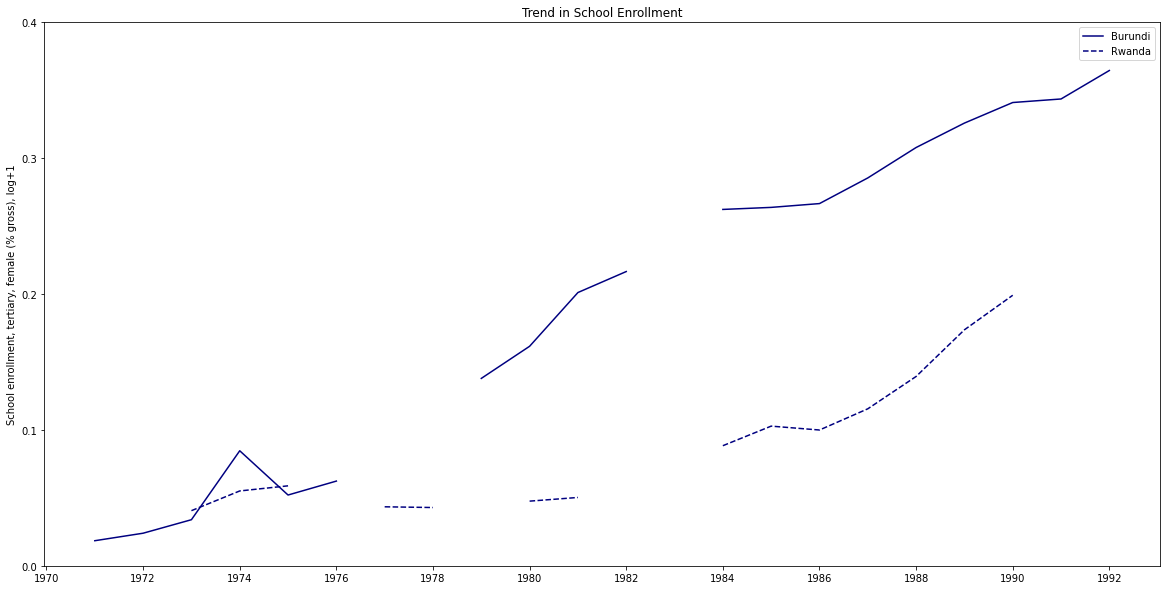

In [44]:
# Graphical representation of the 2 countries' School enrollment log variables

# Restricting the data to the period of interest
df_restricted = df[df['year'] < 1993]

plt.figure(figsize=(20,10))

plt.plot(df_restricted[df_restricted['iso3'] == 'BDI']['year'],
         df_restricted[df_restricted['iso3'] == 'BDI']['School_log'],
         color = "navy",linestyle = '-', label = "Burundi")

plt.plot(df_restricted[df_restricted['iso3'] == 'RWA']['year'],
         df_restricted[df_restricted['iso3'] == 'RWA']['School_log'],
         color = "navy",linestyle = '--', label = "Rwanda")
    
plt.title("Trend in School Enrollment")
plt.xlabel("")
plt.ylabel("School enrollment, tertiary, female (% gross), log+1")
plt.yticks(np.arange(0, 0.5, 0.1))
plt.xticks(np.arange(1970, 1993, 2))
plt.legend()

plt.show()

### DiD Graph (Fetility)

Again, to have a graphical representation and a better overview of the fertility rate trend in the two countries we decided to plot a graph. 

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'DID')

Text(0.5, 0, '')

Text(0, 0.5, 'Fertility rate, total (births per woman)')

([<matplotlib.axis.YTick at 0x7fd837012fd0>,
 <a list of 2 Text major ticklabel objects>)

([<matplotlib.axis.XTick at 0x7fd837012760>,
 <a list of 26 Text major ticklabel objects>)

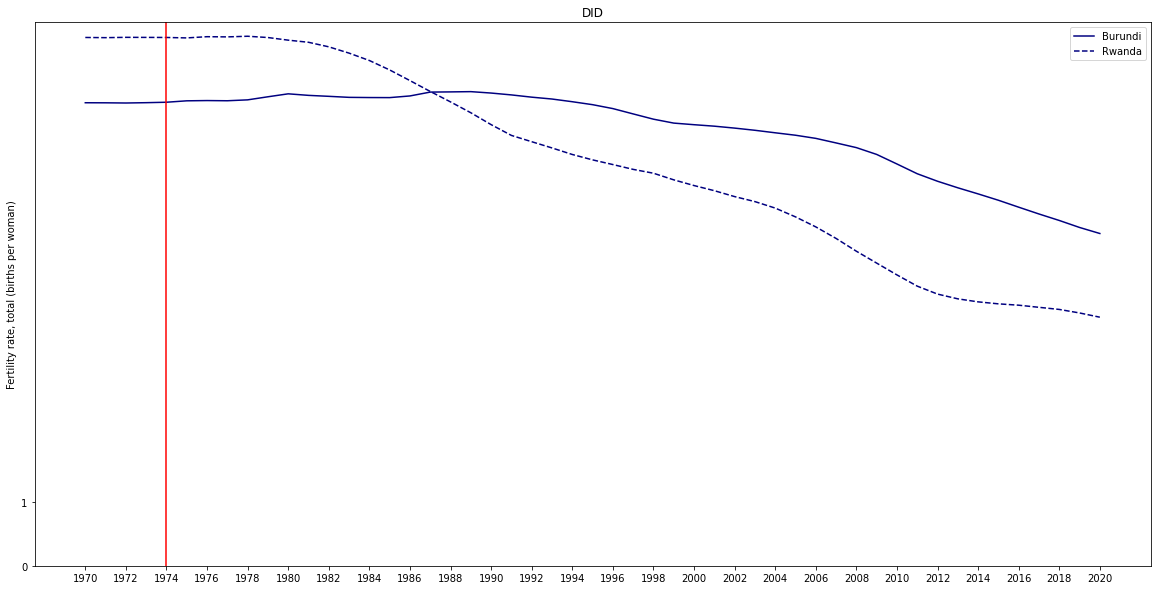

In [45]:
# Graphical representation of the 2 countries' Fertility variables
plt.figure(figsize=(20,10))

plt.plot(df[df['iso3'] == 'BDI']['year'],
         df[df['iso3'] == 'BDI']['Fertility'],
         color = "navy",linestyle = '-', label = "Burundi")

plt.plot(df[df['iso3'] == 'RWA']['year'],
         df[df['iso3'] == 'RWA']['Fertility'],
         color = "navy",linestyle = '--', label = "Rwanda")
    
plt.title("DID")
plt.xlabel("")
plt.ylabel("Fertility rate, total (births per woman)")
plt.axvline(x=1974, ymin=0, ymax=6, color='red')
plt.yticks(range(2))
plt.xticks(np.arange(1970, 2021, 2))
plt.legend()

plt.show()

What is possible to notice from this graph is that Rwanda and Burundi seem to have a parallel trend in the fertility rate from 1970 to 1984. As we expected, the effect of a change in the female tertiary education rate are experienced after few years. 

Therefore, we decided to continue our DiD analysis.

### DiD Formula Model

In [46]:
# Prior to the DID, we create dummy variables to use as outcome
df_BR = df.loc[(df['iso3'] == 'BDI') | (df['iso3'] == 'RWA')]
df_BR

df_BR['post'] = 0
df_BR['treat'] = 0

df_BR.loc[df_BR['year'] >1974,'post'] = 1
df_BR.loc[df_BR['iso3'] == 'BDI','treat'] = 1
df_BR

iso3  country  year   School  Government  Contraceptive  Fertility  \
9485  BDI  Burundi  1970      NaN         NaN            NaN      7.214   
9484  BDI  Burundi  1971  0.01863         NaN            NaN      7.213   
9483  BDI  Burundi  1972  0.02427         NaN            NaN      7.210   
9482  BDI  Burundi  1973  0.03450         NaN            NaN      7.215   
9481  BDI  Burundi  1974  0.08833         NaN            NaN      7.222   
...   ...      ...   ...      ...         ...            ...        ...   
2758  RWA   Rwanda  2016  6.70845     3.43673            NaN      4.060   
2757  RWA   Rwanda  2017  6.97135     3.12646            NaN      4.027   
2756  RWA   Rwanda  2018  6.01428     3.07375            NaN      3.994   
2755  RWA   Rwanda  2019  5.68202     3.23707            NaN      3.939   
2754  RWA   Rwanda  2020  6.47335     3.33055           64.1      3.873   

      School_log  School_log % change  
9485         NaN             0.000000  
9484    0.018459            -0.994978  
9483    0.023980             0.299133  
9482    0.033918             0.414428  
9481    0.084644             1.495544  
...          ...                  ...  
2758    2.042317            -0.000894  
2757    2.075854             0.016421  
2756    1.947948            -0.061616  
2755    1.899420            -0.024912  
2754    2.011343             0.058925  

[102 rows x 9 columns]

<ipython-input-46-6e03e3c26e0b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-6e03e3c26e0b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

iso3  country  year   School  Government  Contraceptive  Fertility  \
9485  BDI  Burundi  1970      NaN         NaN            NaN      7.214   
9484  BDI  Burundi  1971  0.01863         NaN            NaN      7.213   
9483  BDI  Burundi  1972  0.02427         NaN            NaN      7.210   
9482  BDI  Burundi  1973  0.03450         NaN            NaN      7.215   
9481  BDI  Burundi  1974  0.08833         NaN            NaN      7.222   
...   ...      ...   ...      ...         ...            ...        ...   
2758  RWA   Rwanda  2016  6.70845     3.43673            NaN      4.060   
2757  RWA   Rwanda  2017  6.97135     3.12646            NaN      4.027   
2756  RWA   Rwanda  2018  6.01428     3.07375            NaN      3.994   
2755  RWA   Rwanda  2019  5.68202     3.23707            NaN      3.939   
2754  RWA   Rwanda  2020  6.47335     3.33055           64.1      3.873   

      School_log  School_log % change  post  treat  
9485         NaN             0.000000     0      1  
9484    0.018459            -0.994978     0      1  
9483    0.023980             0.299133     0      1  
9482    0.033918             0.414428     0      1  
9481    0.084644             1.495544     0      1  
...          ...                  ...   ...    ...  
2758    2.042317            -0.000894     1      0  
2757    2.075854             0.016421     1      0  
2756    1.947948            -0.061616     1      0  
2755    1.899420            -0.024912     1      0  
2754    2.011343             0.058925     1      0  

[102 rows x 11 columns]

In [47]:
# Set the index for fixed effects, and creating a multi-index for the 
# PanelOLS function to work

df_BR['id'] = df_BR['treat']
df_BR['t'] = df_BR['year']
df_BR.reset_index(inplace=True)
df_BR = df_BR.set_index(['id', 't'])
df_BR

<ipython-input-47-1b6bd6baceac>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-1b6bd6baceac>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index iso3  country  year   School  Government  Contraceptive  \
id t                                                                     
1  1970   9485  BDI  Burundi  1970      NaN         NaN            NaN   
   1971   9484  BDI  Burundi  1971  0.01863         NaN            NaN   
   1972   9483  BDI  Burundi  1972  0.02427         NaN            NaN   
   1973   9482  BDI  Burundi  1973  0.03450         NaN            NaN   
   1974   9481  BDI  Burundi  1974  0.08833         NaN            NaN   
...        ...  ...      ...   ...      ...         ...            ...   
0  2016   2758  RWA   Rwanda  2016  6.70845     3.43673            NaN   
   2017   2757  RWA   Rwanda  2017  6.97135     3.12646            NaN   
   2018   2756  RWA   Rwanda  2018  6.01428     3.07375            NaN   
   2019   2755  RWA   Rwanda  2019  5.68202     3.23707            NaN   
   2020   2754  RWA   Rwanda  2020  6.47335     3.33055           64.1   

         Fertility  School_log  School_log % change  post  treat  
id t                                                              
1  1970      7.214         NaN             0.000000     0      1  
   1971      7.213    0.018459            -0.994978     0      1  
   1972      7.210    0.023980             0.299133     0      1  
   1973      7.215    0.033918             0.414428     0      1  
   1974      7.222    0.084644             1.495544     0      1  
...            ...         ...                  ...   ...    ...  
0  2016      4.060    2.042317            -0.000894     1      0  
   2017      4.027    2.075854             0.016421     1      0  
   2018      3.994    1.947948            -0.061616     1      0  
   2019      3.939    1.899420            -0.024912     1      0  
   2020      3.873    2.011343             0.058925     1      0  

[102 rows x 12 columns]

In order to understand whether the policy enacted in 1973 in Burindi lead to a difference in fertility in the two countries we need to look at the term β3 (post:treat) that describes the DiD. As in the case of UK and US, the coefficient β3 is significant and different from zero, which means that the implementation of the education policy in 1973 had an effect, which means that the mean change in outcome from before to after the policy in 1973 was different in the two countries. However, if in UK and US this effect is negative, here the difference in difference estimator β3 is positive,  showing a small increase (1.64) in fertility rate in Burundi, where the education policy was implemented, with respect to Rwanda.

In [48]:
reg3 = PanelOLS.from_formula("Fertility ~ post*treat+1", df_BR)
res3 = reg3.fit(cov_type = 'clustered') # cluster_entity=True, cluster_time=True
res3

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              Fertility   R-squared:                        0.1779
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                 102   R-squared (Within):               0.1457
Date:                Fri, Dec 23 2022   R-squared (Overall):              0.1779
Time:                        21:59:10   Log-likelihood                   -153.93
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7.0680
Entities:                           2   P-value                           0.0002
Avg Obs:                       51.000   Distribution:                    F(3,98)
Min Obs:                       51.000                                           
Max Obs:                       51.000   F-statistic (robust):          8.918e+04
                                        P-value                           0.0000
Time periods:                      51   Distribution:                    F(3,98)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      8.2310     0.0008  1.078e+04     0.0000      8.2295      8.2325
post          -2.1009     0.2236    -9.3945     0.0000     -2.5447     -1.6571
treat         -1.0162     0.0020    -517.00     0.0000     -1.0201     -1.0123
post:treat     1.6458     0.2451     6.7139     0.0000      1.1593      2.1322
==============================================================================


PanelEffectsResults, id: 0x7fd837082df0

### Placebo Test

In the following code we specify the placebo period from 1971 to 1974. We do not include 1970 because there is no valid data.

In [49]:
df_placebo2 = df_BR.loc[df_BR['year'] <= 1974,:]
df_placebo2.loc[df_placebo2['year'] >=1971,'post'] = 1
df_placebo2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index iso3  country  year   School  Government  Contraceptive  \
id t                                                                     
1  1970   9485  BDI  Burundi  1970      NaN         NaN            NaN   
   1971   9484  BDI  Burundi  1971  0.01863         NaN            NaN   
   1972   9483  BDI  Burundi  1972  0.02427         NaN            NaN   
   1973   9482  BDI  Burundi  1973  0.03450         NaN            NaN   
   1974   9481  BDI  Burundi  1974  0.08833         NaN            NaN   
0  1970   2804  RWA   Rwanda  1970      NaN         NaN            NaN   
   1971   2803  RWA   Rwanda  1971  0.03011         NaN            NaN   
   1972   2802  RWA   Rwanda  1972      NaN         NaN            NaN   
   1973   2801  RWA   Rwanda  1973  0.04140         NaN            NaN   
   1974   2800  RWA   Rwanda  1974  0.05662         NaN            NaN   

         Fertility  School_log  School_log % change  post  treat  
id t                                                              
1  1970      7.214         NaN             0.000000     0      1  
   1971      7.213    0.018459            -0.994978     1      1  
   1972      7.210    0.023980             0.299133     1      1  
   1973      7.215    0.033918             0.414428     1      1  
   1974      7.222    0.084644             1.495544     1      1  
0  1970      8.231         NaN             0.000000     0      0  
   1971      8.228    0.029666            -0.993474     1      0  
   1972      8.233         NaN             0.000000     1      0  
   1973      8.232    0.040566             0.367442     1      0  
   1974      8.231    0.055075             0.357669     1      0

Also in this case, as for UK and US, we conducted a placebo analysis, studying the effect of an hypothetical policy before 1974, to show that the effect does not exist when it “should not” exist. (Gelman Andrew, 2018).
The table studies the parallel-trend assumption, which states that if no treatment had occurred, the difference between the treated group and the untreated group would have stayed the same in the post-treatment period as it was in the pre-treatment period (2). In particular we can see that B3 has a value of 0.001 which is not statistically significant (the p-value is higher than 0.05) indicating that there are no DiD effects in the pre-policy period. This means that the trends of the fertility rate before 1974 are relatively parallel across the two countries.


In [50]:
reg4 = PanelOLS.from_formula("Fertility ~ post*treat+1", df_placebo2)
rez = reg4.fit(cov_type = 'clustered')
rez

/usr/local/lib/python3.8/dist-packages/linearmodels/panel/results.py:87: RuntimeWarning:

invalid value encountered in sqrt



PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:              Fertility   R-squared:                        1.0000
Estimator:                   PanelOLS   R-squared (Between):              1.0000
No. Observations:                  10   R-squared (Within):               0.0086
Date:                Fri, Dec 23 2022   R-squared (Overall):              1.0000
Time:                        21:59:10   Log-likelihood                    43.792
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   5.612e+04
Entities:                           2   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                     F(3,6)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):         -5.575e+34
                                        P-value                           1.0000
Time periods:                       5   Distribution:                     F(3,6)
Avg Obs:                       2.0000                                           
Min Obs:                       2.0000                                           
Max Obs:                       2.0000                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      8.2310                                                         
post       -4.286e-19     0.0012 -3.549e-16     1.0000     -0.0030      0.0030
treat         -1.0170  1.591e-18 -6.391e+17     0.0000     -1.0170     -1.0170
post:treat     0.0010     0.0031     0.3230     0.7576     -0.0066      0.0086
==============================================================================


PanelEffectsResults, id: 0x7fd836fc4c70

## Malta & Cyprus

### Exploration of Fertility Rate

In [51]:
# As before for the School variable, we create a percentage change column for 
# the Fertility variable

s = df['Fertility'].pct_change()
s.name = 'Fertility % change'
df = pd.concat([df, s], axis=1)
df

iso3   country  year   School  Government  Contraceptive  Fertility  \
10607  ABW     Aruba  1970      NaN         NaN            NaN      2.908   
10606  ABW     Aruba  1971      NaN         NaN            NaN      2.788   
10605  ABW     Aruba  1972      NaN         NaN            NaN      2.691   
10604  ABW     Aruba  1973      NaN         NaN            NaN      2.613   
10603  ABW     Aruba  1974      NaN         NaN            NaN      2.552   
...    ...       ...   ...      ...         ...            ...        ...   
4      ZWE  Zimbabwe  2016  8.54473     5.47262            NaN      3.771   
3      ZWE  Zimbabwe  2017  9.68927     5.81878            NaN      3.706   
2      ZWE  Zimbabwe  2018      NaN     3.86611            NaN      3.659   
1      ZWE  Zimbabwe  2019      NaN         NaN            NaN      3.599   
0      ZWE  Zimbabwe  2020      NaN         NaN            NaN      3.545   

       School_log  School_log % change  Fertility % change  
10607         NaN                  NaN                 NaN  
10606         NaN                  NaN           -0.041265  
10605         NaN                  NaN           -0.034792  
10604         NaN                  NaN           -0.028986  
10603         NaN                  NaN           -0.023345  
...           ...                  ...                 ...  
4        2.255989            -0.027445           -0.020265  
3        2.369240             0.050200           -0.017237  
2             NaN             0.000000           -0.012682  
1             NaN             0.000000           -0.016398  
0             NaN             0.000000           -0.015004  

[13566 rows x 10 columns]

<Figure size 7200x7200 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fd836f7cb20>,
 <a list of 26 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x7fd836f7b850>,
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 1.0, 'Distribution of fertility rate over time')

Text(0.5, 0, 'Year')

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 10 Text major ticklabel objects>)

(array([1970, 1972, 1974, 1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990,
        1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
        2014, 2016, 2018, 2020]), <a list of 26 Text major ticklabel objects>)

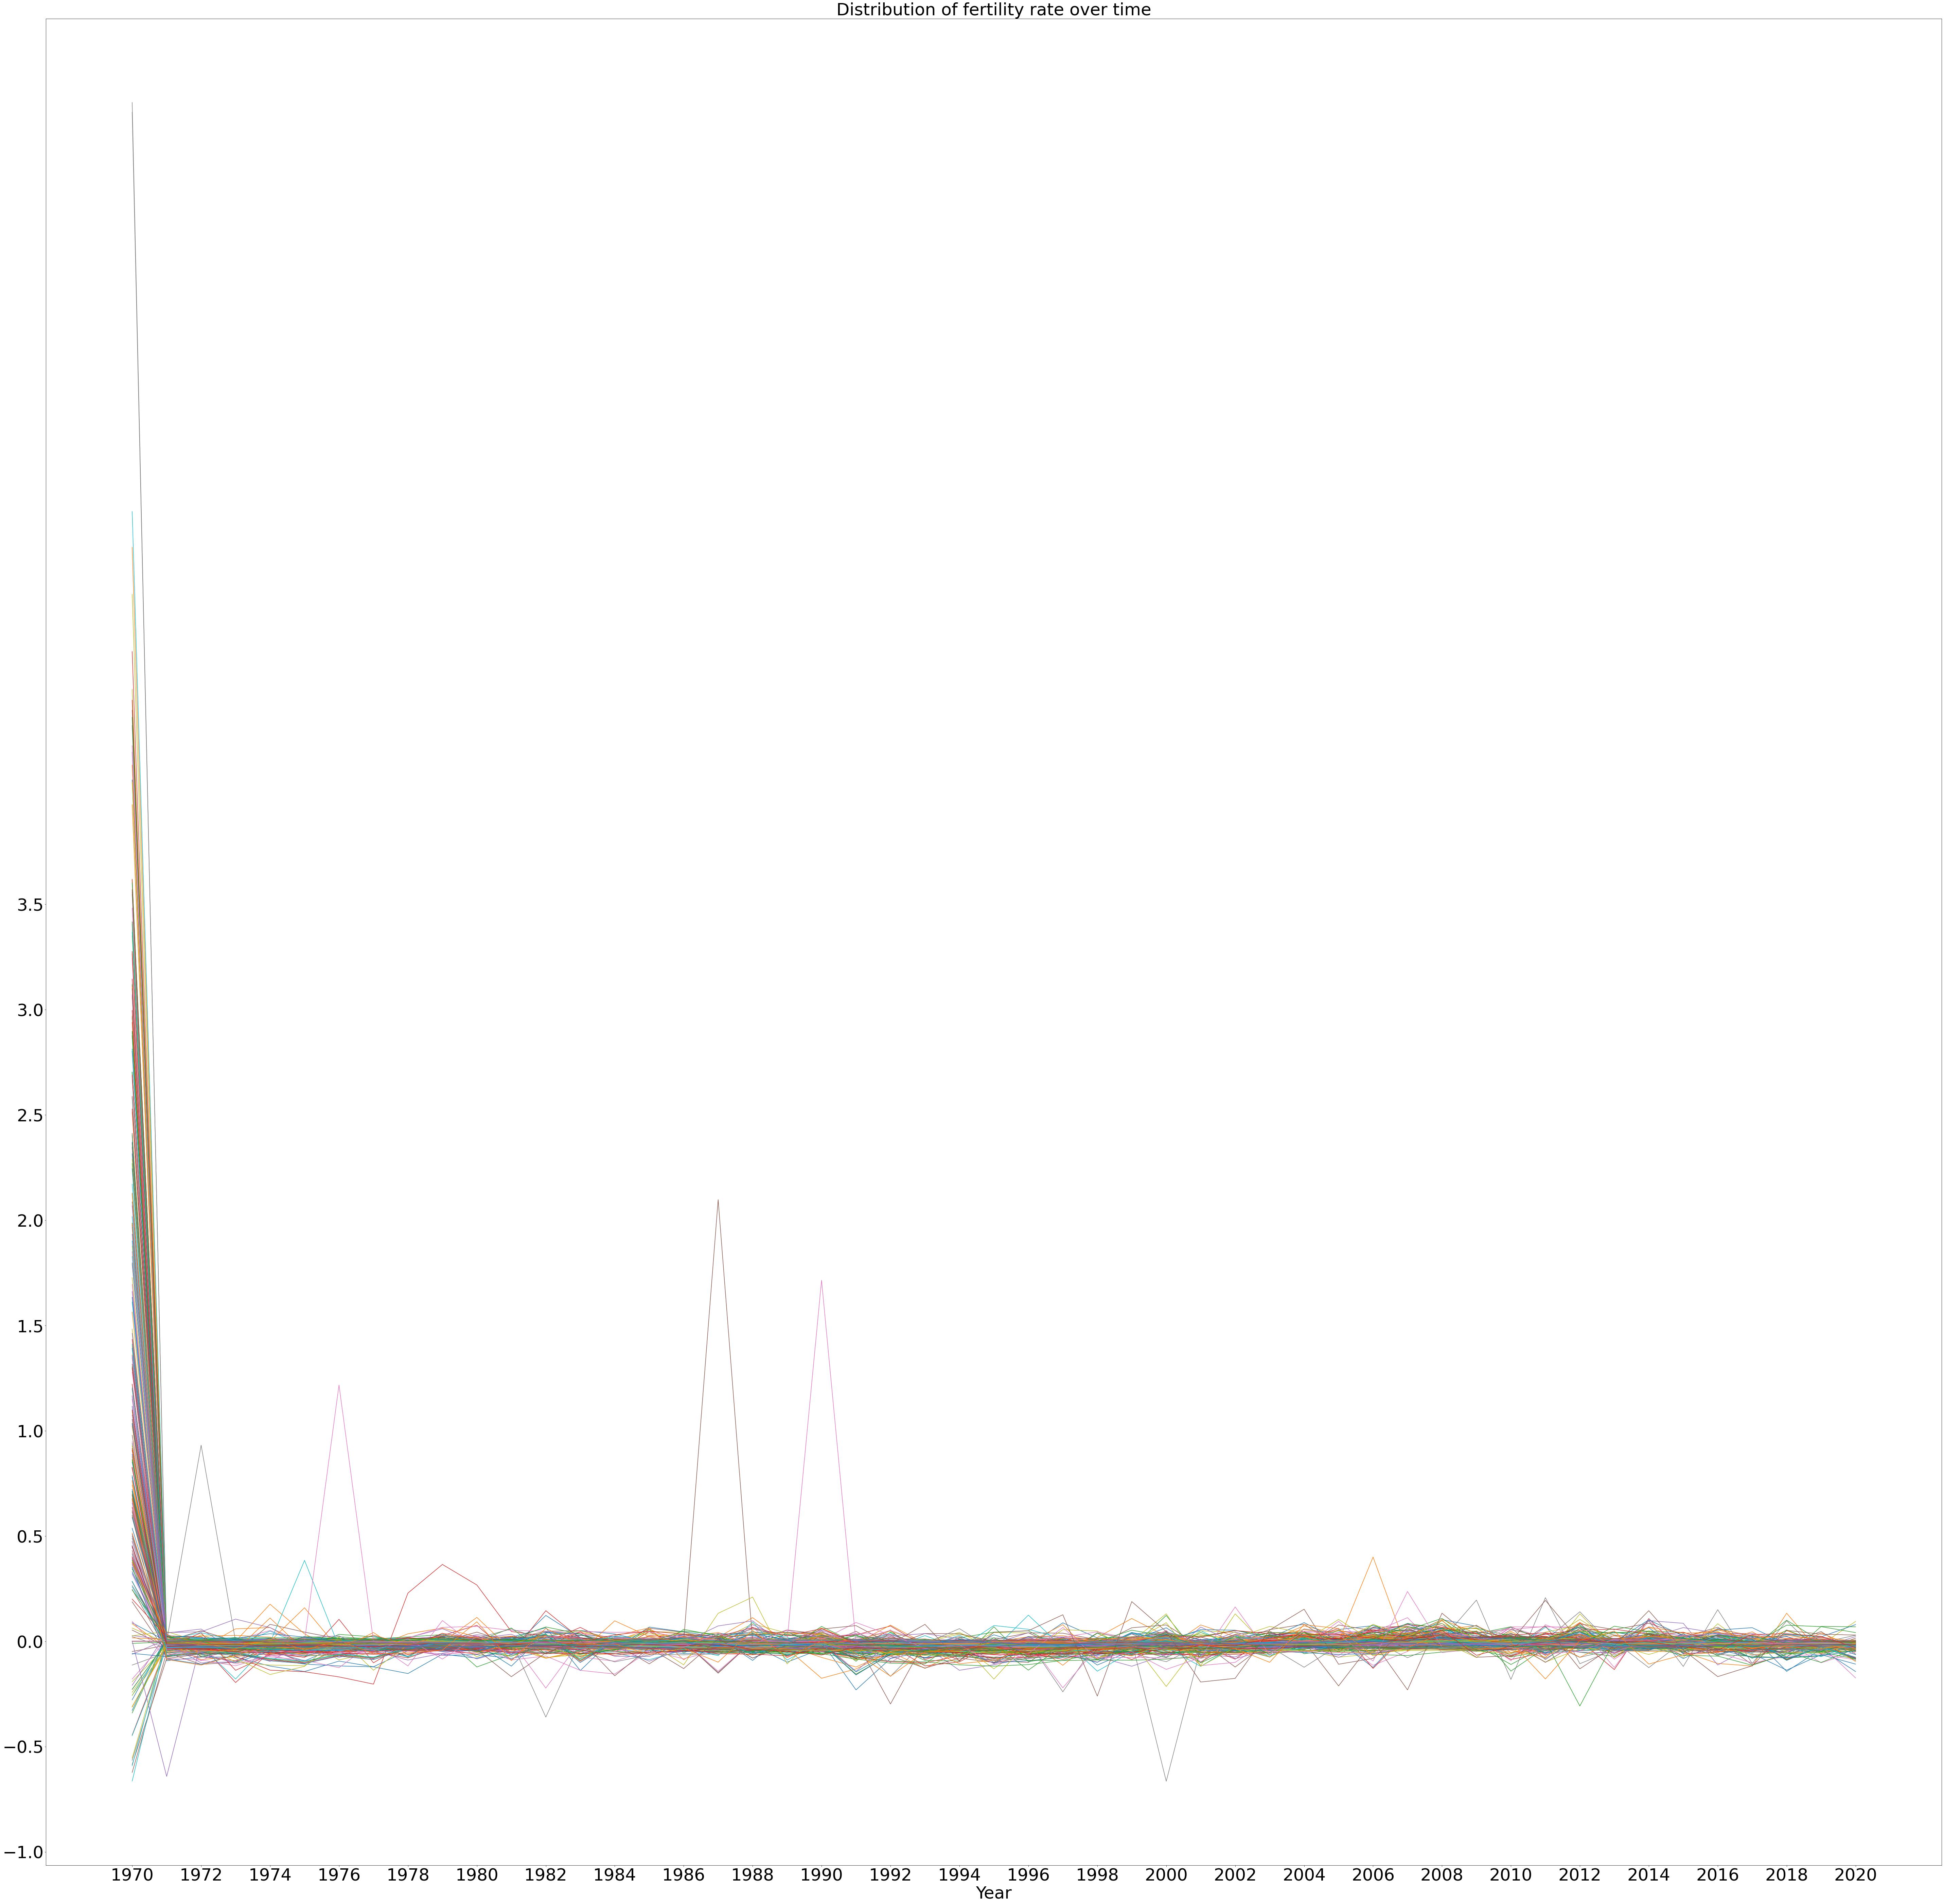

In [52]:
# Display the variable, to spot higher than usual values

iso3 = df['iso3'].unique().tolist()
plt.figure(figsize=(100,100))
plt.xticks(np.arange(1970, 2021, 2))
plt.yticks(np.arange(-1, 4, 0.5))
plt.title('Distribution of fertility rate over time',fontsize=50)
plt.xlabel('Year',fontsize=50)
plt.yticks(size = 50)
plt.xticks(size = 50)
for country in iso3:
    df2 = df[df['iso3'] == country]
    plt.plot(df2['year'],df2['Fertility % change'],label = country)

In [53]:
# Selecting countries, one with higher than usual value and a similar one for 
# comparison, based on data availability

df[(df['year'] > 1971) & (df['Fertility % change'] > 0.2)]
df[(df['year'] > 1971) & (df['Fertility % change'] < -0.2)]

#study the data availability of Malta and Cyprus as possible countries to analyse. 
df[df['country'] == 'Malta'] # country where a big fertility change occured
df[df['country'] == 'Cyprus'] # country similar to Malta for comparison

iso3                country  year     School  Government  Contraceptive  \
8480  CUW                Curacao  2006        NaN         NaN            NaN   
8259  DMA               Dominica  1972        NaN         NaN            NaN   
9375  KHM               Cambodia  1978        NaN         NaN            NaN   
9374  KHM               Cambodia  1979        NaN         NaN            NaN   
9373  KHM               Cambodia  1980        NaN         NaN            NaN   
5211  LIE          Liechtenstein  2011  29.935129     2.55604            NaN   
4725  MHL       Marshall Islands  1987        NaN         NaN            NaN   
4788  MLT                  Malta  1975   5.432370     4.42221            NaN   
183   PSE     West Bank and Gaza  1990        NaN         NaN            NaN   
2327  SGP              Singapore  1988        NaN     3.65207            NaN   
2441  SYC             Seychelles  1976        NaN     4.74596            NaN   
217   VIR  Virgin Islands (U.S.)  2007        NaN         NaN            NaN   

      Fertility  School_log  School_log % change  Fertility % change  
8480      2.100         NaN             0.000000            0.400000  
8259      5.500         NaN             0.000000            0.931180  
9375      3.338         NaN             0.000000            0.229013  
9374      4.556         NaN             0.000000            0.364889  
9373      5.774         NaN             0.000000            0.267340  
5211      1.690    3.431892             0.026009            0.207143  
4725      5.900         NaN             0.000000            2.097113  
4788      2.270    1.861343             0.068987            0.384146  
183       6.778         NaN             0.000000            1.714457  
2327      1.960         NaN             0.000000            0.209877  
2441      4.500         NaN             0.000000            1.216749  
217       2.510         NaN             0.000000            0.236453

iso3                    country  year     School  Government  \
8954  CHN                      China  1991        NaN         NaN   
8249  DMA                   Dominica  1982        NaN         NaN   
8234  DMA                   Dominica  1997        NaN         NaN   
9376  KHM                   Cambodia  1977        NaN         NaN   
5222  LIE              Liechtenstein  2000        NaN         NaN   
4707  MHL           Marshall Islands  2005        NaN         NaN   
3386  PLW                      Palau  2000  65.396828     8.01798   
2660  SMR                 San Marino  2012        NaN         NaN   
2272  SXM  Sint Maarten (Dutch part)  1992        NaN         NaN   
2257  SXM  Sint Maarten (Dutch part)  2007        NaN         NaN   
2435  SYC                 Seychelles  1982        NaN         NaN   
2420  SYC                 Seychelles  1997        NaN         NaN   
9661  VGB     British Virgin Islands  1998        NaN         NaN   

      Contraceptive  Fertility  School_log  School_log % change  \
8954            NaN      1.934         NaN             0.000000   
8249           62.3      3.520         NaN             0.000000   
8234            NaN      1.900         NaN             0.000000   
9376            NaN      2.716         NaN             0.000000   
5222            NaN      1.570         NaN             0.000000   
4707            NaN      4.500         NaN             0.000000   
3386            NaN      1.830    4.195649             0.147269   
2660            NaN      1.260         NaN             0.000000   
2272            NaN      2.030         NaN             0.000000   
2257            NaN      1.500         NaN             0.000000   
2435            NaN      3.500         NaN             0.000000   
2420            NaN      2.100         NaN             0.000000   
9661            NaN      1.501         NaN             0.000000   

      Fertility % change  
8954           -0.230708  
8249           -0.360000  
8234           -0.240000  
9376           -0.203285  
5222           -0.664743  
4707           -0.211909  
3386           -0.214592  
2660           -0.307312  
2272           -0.297578  
2257           -0.230769  
2435           -0.222222  
2420           -0.221068  
9661           -0.260227

iso3 country  year     School  Government  Contraceptive  Fertility  \
4793  MLT   Malta  1970        NaN         NaN            NaN       2.03   
4792  MLT   Malta  1971        NaN    6.151970           87.0       2.06   
4791  MLT   Malta  1972   4.870110    5.549990            NaN       2.01   
4790  MLT   Malta  1973   5.361040    5.269700            NaN       1.65   
4789  MLT   Malta  1974   4.704310    4.493100            NaN       1.64   
4788  MLT   Malta  1975   5.432370    4.422210            NaN       2.27   
4787  MLT   Malta  1976   6.214850    3.831890            NaN       2.21   
4786  MLT   Malta  1977   4.938090    3.897610            NaN       2.14   
4785  MLT   Malta  1978   4.248390    3.348830            NaN       2.05   
4784  MLT   Malta  1979   2.407370    3.153640            NaN       2.10   
4783  MLT   Malta  1980   1.604970         NaN            NaN       1.99   
4782  MLT   Malta  1981   1.652120    2.865330            NaN       1.87   
4781  MLT   Malta  1982   1.395150    2.854080            NaN       1.90   
4780  MLT   Malta  1983   1.549400    3.314690            NaN       1.92   
4779  MLT   Malta  1984   2.467780    3.078720            NaN       1.95   
4778  MLT   Malta  1985   3.238370    3.248340            NaN       1.95   
4777  MLT   Malta  1986   3.858160    3.105720            NaN       1.93   
4776  MLT   Malta  1987   4.123030    3.165320            NaN       1.97   
4775  MLT   Malta  1988   4.440890    3.338240            NaN       2.06   
4774  MLT   Malta  1989   5.448830    3.588740            NaN       2.10   
4773  MLT   Malta  1990   8.999320    3.831420            NaN       2.02   
4772  MLT   Malta  1991  11.405040    3.920300            NaN       1.99   
4771  MLT   Malta  1992  13.733800    4.314100            NaN       2.07   
4770  MLT   Malta  1993  17.855440         NaN           85.8       1.96   
4769  MLT   Malta  1994  19.668171         NaN            NaN       1.84   
4768  MLT   Malta  1995  21.303850         NaN            NaN       1.77   
4767  MLT   Malta  1996  23.226290         NaN            NaN       1.99   
4766  MLT   Malta  1997  23.856091         NaN            NaN       1.93   
4765  MLT   Malta  1998  25.920071    4.184720            NaN       1.84   
4764  MLT   Malta  1999  25.199261         NaN            NaN       1.73   
4763  MLT   Malta  2000  23.811541         NaN            NaN       1.68   
4762  MLT   Malta  2001  28.676161         NaN            NaN       1.48   
4761  MLT   Malta  2002  28.975241    4.143050            NaN       1.45   
4760  MLT   Malta  2003  35.648338         NaN            NaN       1.48   
4759  MLT   Malta  2004  30.722469    4.434930            NaN       1.40   
4758  MLT   Malta  2005  37.203609         NaN            NaN       1.38   
4757  MLT   Malta  2006  35.697250         NaN            NaN       1.36   
4756  MLT   Malta  2007  39.557739    5.947500            NaN       1.35   
4755  MLT   Malta  2008  38.449131    5.501210            NaN       1.43   
4754  MLT   Malta  2009  41.020611    5.070390            NaN       1.42   
4753  MLT   Malta  2010  42.949570    6.250040            NaN       1.36   
4752  MLT   Malta  2011  46.124882    7.696130            NaN       1.45   
4751  MLT   Malta  2012  49.100422    6.345460            NaN       1.42   
4750  MLT   Malta  2013  50.553909    7.579240            NaN       1.36   
4749  MLT   Malta  2014  50.688751    7.004210            NaN       1.38   
4748  MLT   Malta  2015  55.027561    5.023980            NaN       1.37   
4747  MLT   Malta  2016  56.547260    5.084460            NaN       1.37   
4746  MLT   Malta  2017  63.173981    4.651630            NaN       1.26   
4745  MLT   Malta  2018  68.769691    5.136471            NaN       1.23   
4744  MLT   Malta  2019  76.188019    4.988060            NaN       1.14   
4743  MLT   Malta  2020  83.966728    5.870000            NaN       1.13   

      School_log  School_log % change  Fertility % c

iso3 country  year     School  Government  Contraceptive  Fertility  \
8465  CYP  Cyprus  1970        NaN         NaN            NaN      3.065   
8464  CYP  Cyprus  1971   1.149080         NaN            NaN      3.036   
8463  CYP  Cyprus  1972   1.496360         NaN            NaN      2.988   
8462  CYP  Cyprus  1973   1.440790         NaN            NaN      2.403   
8461  CYP  Cyprus  1974   1.263110         NaN            NaN      2.280   
8460  CYP  Cyprus  1975        NaN    4.335020            NaN      2.107   
8459  CYP  Cyprus  1976        NaN    3.819700            NaN      2.327   
8458  CYP  Cyprus  1977        NaN    3.385490            NaN      2.089   
8457  CYP  Cyprus  1978   1.940070    3.312340            NaN      2.079   
8456  CYP  Cyprus  1979   2.128670    3.353130            NaN      2.136   
8455  CYP  Cyprus  1980   2.118640    3.426010            NaN      2.298   
8454  CYP  Cyprus  1981   2.518830    3.791320            NaN      2.154   
8453  CYP  Cyprus  1982   2.429960    3.731780            NaN      2.467   
8452  CYP  Cyprus  1983   2.579310         NaN            NaN      2.499   
8451  CYP  Cyprus  1984   3.239860    3.601910            NaN      2.516   
8450  CYP  Cyprus  1985   3.743840    3.586960            NaN      2.434   
8449  CYP  Cyprus  1986   4.946660    3.488970            NaN      2.457   
8448  CYP  Cyprus  1987   5.432180    3.448710            NaN      2.389   
8447  CYP  Cyprus  1988   7.083230    3.375470            NaN      2.477   
8446  CYP  Cyprus  1989   8.878720    3.376270            NaN      2.371   
8445  CYP  Cyprus  1990  10.546450    3.339240            NaN      2.405   
8444  CYP  Cyprus  1991  11.146320    3.575390            NaN      2.336   
8443  CYP  Cyprus  1992  11.668770    3.780300            NaN      2.461   
8442  CYP  Cyprus  1993  14.038920    4.095550            NaN      2.247   
8441  CYP  Cyprus  1994  16.131781    4.159970            NaN      2.167   
8440  CYP  Cyprus  1995  19.056959    3.741230            NaN      2.033   
8439  CYP  Cyprus  1996  22.498501         NaN            NaN      1.953   
8438  CYP  Cyprus  1997  22.999590         NaN            NaN      1.858   
8437  CYP  Cyprus  1998        NaN         NaN            NaN      1.764   
8436  CYP  Cyprus  1999  23.328600    4.772080            NaN      1.674   
8435  CYP  Cyprus  2000  22.201891    4.989540            NaN      1.637   
8434  CYP  Cyprus  2001  24.925289    5.115520            NaN      1.563   
8433  CYP  Cyprus  2002  28.035391    5.581670            NaN      1.498   
8432  CYP  Cyprus  2003  32.507820    6.670230            NaN      1.509   
8431  CYP  Cyprus  2004  35.494759    6.117720            NaN      1.517   
8430  CYP  Cyprus  2005  35.330742    6.286670            NaN      1.480   
8429  CYP  Cyprus  2006  34.204418    6.330270            NaN      1.515   
8428  CYP  Cyprus  2007  36.061909    6.280830            NaN      1.451   
8427  CYP  Cyprus  2008  41.710819    6.722760            NaN      1.480   
8426  CYP  Cyprus  2009  48.462078    7.205450            NaN      1.481   
8425  CYP  Cyprus  2010  45.629761    6.542800            NaN      1.438   
8424  CYP  Cyprus  2011  47.298820    6.538540            NaN      1.360   
8423  CYP  Cyprus  2012  49.718349    5.911855            NaN      1.386   
8422  CYP  Cyprus  2013  53.691620    6.483780            NaN      1.305   
8421  CYP  Cyprus  2014  62.598831    6.440500            NaN      1.315   
8420  CYP  Cyprus  2015  69.395470    6.326130            NaN      1.326   
8419  CYP  Cyprus  2016  73.412460    6.145410            NaN      1.360   
8418  CYP  Cyprus  2017  82.354134    5.718530            NaN      1.322   
8417  CYP  Cyprus  2018  84.495499    5.152854            NaN      1.320   
8416  CYP  Cyprus  2019  91.099983    5.250640            NaN      1.332   
8415  CYP  Cyprus  2020  98.122719    6.060000            NaN      1.328   

      School_log  School_log % change  Fertility % c

From the latter graph it is possible to notice few positive and negative picks. 

We first analyzed the negative picks and found that they are of small countries such as San Marino, Dominica, Liechtenstein, with respectively 34.000, 72.000 and 38.000 citizens in 2021. In these countries also a change of 100 births has huge effects on the fertility rate. We decided to discard these countries for being too small and therefore a threat to external validity. Instead of continuing studying countries with a negative and small % change in fertility rate we decided to analyze the positive picks. For the highest picks (change >0.5) we found very small countries, as in the case of negative picks, but when we analyzed the countries with smaller but still drastic changes in the fertility rate (>0.2) we found Malta. 

Malta is still a relatively small country, with 500.000 citizens in 2021 however it is the most populated country among the ones with relevant picks in both positive and negative % of fertility rate. Indeed, we believe that it offers the best trade-off between number of inhabitants (not too small as the countries listed in the latter paragraph) and the pick in the change of fertility (higher than larger countries).

Malta is an island in the Mediterranean Sea. In order to apply the diff-in-diff analysis we needed to find a similar country. After some research we found that the country with with more similar aspects is Cyprus, another country situated on an island in the Mediterranean sea with 1.2 million citizens. 
Therefore, we decided to study the fertility and education trend in the two countries.


### DiD Graph (Fertility)

By conducting some research on the causes of the shock experienced in 1975, we found that Malta implemented a major education reform in 1974, which included the introduction of comprehensive education, the establishment of a unified education system, and the adoption of a new curriculum.The reform had a significant impact on the education system in Malta and laid the foundation for the country's current education system. It is still considered a landmark reform in the history of education in Malta.

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'DID')

Text(0.5, 0, '')

Text(0, 0.5, 'Fertility rate, total (births per woman)')

([<matplotlib.axis.YTick at 0x7fd836c32be0>,
 <a list of 2 Text major ticklabel objects>)

([<matplotlib.axis.XTick at 0x7fd836c32370>,
 <a list of 26 Text major ticklabel objects>)

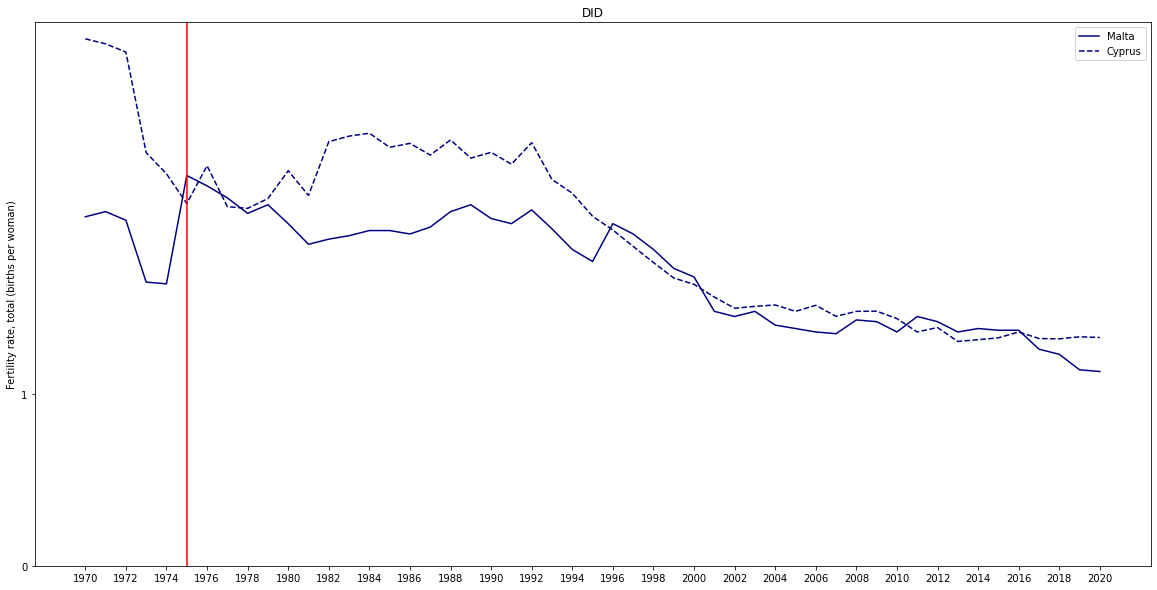

In [54]:
# Graphical representation of the 2 countries' Fertility variables
plt.figure(figsize=(20,10))

plt.plot(df[df['iso3'] == 'MLT']['year'],
         df[df['iso3'] == 'MLT']['Fertility'],
         color = "navy",linestyle = '-', label = "Malta")

plt.plot(df[df['iso3'] == 'CYP']['year'],
         df[df['iso3'] == 'CYP']['Fertility'],
         color = "navy",linestyle = '--', label = "Cyprus")
    
plt.title("DID")
plt.xlabel("")
plt.ylabel("Fertility rate, total (births per woman)")
plt.axvline(x=1975, ymin=0, ymax=6, color='red')
plt.yticks(range(2))
plt.xticks(np.arange(1970, 2021, 2))
plt.legend()

plt.show()

It is possible to notice from the graph that since 1975 fertility rate started to decrease, however if the decrease would have been primarily led by the increase in education, then the decrease should have started few years after the implementation policy, and not the same year. Morevoer, the trends of both countries, especially before 1974, aren't parallel, therefore not complying with the necessary parallel assumption for the DID analysis. For the reasons listed, we decided to not proceed with the analysis of this countries and to searrch for other possible nations to compare (see UK and US in the main body).